# Unidad 3

## 3.1 - Symbolic computing for ML

In [ ]:
# !wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
# import init; init.init(force_download=False); 

In [6]:
import sys # libreia para manejar excepciones
import sympy as sy # libreria para manejar expresiones simbolicas en lenguaje matematico
import tensorflow as tf # libreria para manejar redes neuronales

sy.init_printing(use_latex=True) # libreria para imprimir expresiones matematicas en formato latex
%load_ext tensorboard  
tf.__version__ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.15.0'

### Recall the machine learning algorithm design process

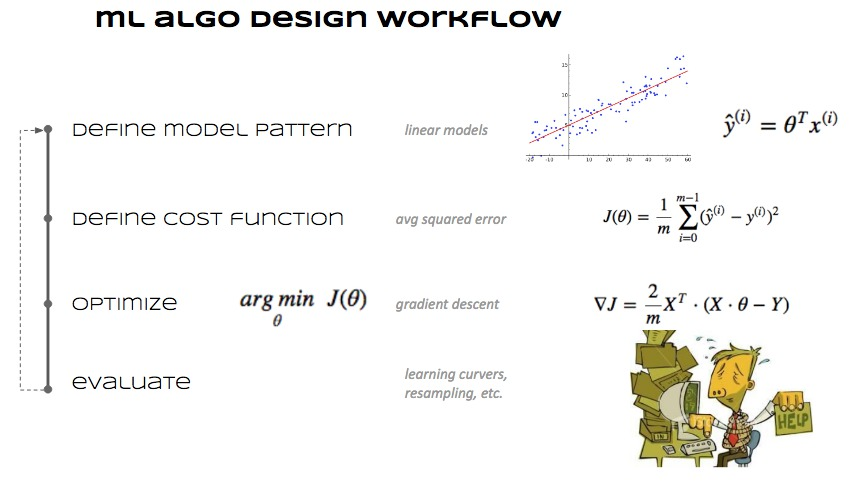

In [7]:
from IPython.display import Image
Image(filename='content/local/imgs/mldesign.jpg', width=800)

### And how we sorted it out for linear regression using a generic optimization library

**Input** and **expected output** (supervised learning)
- $\mathbf{x}^{(i)} \in \mathbb{R}^n$, $y^{(i)} \in \mathbb{R}$

**Prediction model** 
- $\hat{y}^{(i)} = \overline{\theta} \cdot \mathbf{x}^{(i)}$, with $\overline{\theta} \in \mathbb{R}^n$ and assuming $\mathbf{x}^{(i)}_0=1$

**Loss function**
- $J(\overline{\theta}) = \frac{1}{m} \sum_{i=0}^{m-1}(\overline{\theta} \cdot \mathbf{x}^{(i)} - y^{(i)})^2$

**Gradient of loss function** (matrix form)
- $\nabla J = \begin{bmatrix}
\frac{\partial J}{\partial \theta_0}\\
\frac{\partial J}{\partial \theta_1}
\end{bmatrix} = \frac{1}{m}2X^{T}\cdot(X\cdot\theta-Y)$

In [8]:
import numpy as np # libreria para manejar matrices y operaciones matematicas
import matplotlib.pyplot as plt # libreria para graficar 
import pandas as pd # libreria para manejar bases de datos en formato tabla
from scipy.optimize import minimize # libreria para optimizacion de funciones 
# linea para que las graficas se muestren en el notebook
%matplotlib inline  

(150, 2)


Text(0, 0.5, 'densidad_escamas')

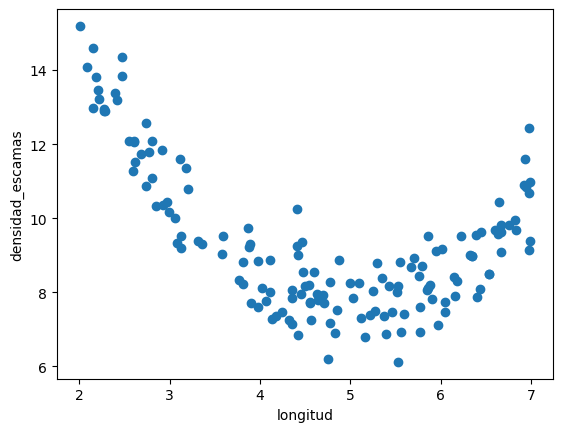

In [9]:
d = pd.read_csv("content/local/data/trilotropicos.csv") # cargar la base de datos 
print(d.shape) # imprimir la dimension de la base de datos
plt.scatter(d.longitud, d.densidad_escamas) # graficar la base de datos 
plt.xlabel(d.columns[0]) # poner el nombre del eje x
plt.ylabel(d.columns[1]) # poner el nombre del eje y

In [13]:
y = d.densidad_escamas.values # extraer la columna de densidad de escamas
X = np.r_[[[1]*len(d), d.longitud.values]].T # construir la matriz de diseno


def n_cost(t):
    return np.mean((X.dot(t)-y)**2) # funcion de costo para minimizar el error cuadratico medio

def n_grad(t):
    return 2*X.T.dot(X.dot(t)-y)/len(X) # gradiente de la funcion de costo 

init_t = np.random.random()*40-5, np.random.random()*20-10 # inicializacion aleatoria de los parametros 
r = minimize(n_cost, init_t, method="BFGS", jac=n_grad) # minimizacion de la funcion de costo 
display(r)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.744766257080573
        x: [ 1.269e+01 -7.181e-01]
      nit: 10
      jac: [ 1.335e-06  6.530e-06]
 hess_inv: [[ 5.573e+00 -1.092e+00]
            [-1.092e+00  2.346e-01]]
     nfev: 11
     njev: 11

### Using `sympy` computer algebra system (CAS)

In [18]:
x,y = sy.symbols("x y") # declarar variables simbolicas 

In [19]:
z = x**2 + x*sy.cos(y) # declarar una funcion simbolica
z # imprimir la funcion simbolica

we can evaluate the expresion by providing concrete values for the symbolic variables

In [21]:
z.subs({x: 2, y: sy.pi/4}) # evaluar la funcion simbolica


and obtain numerical approximations of these values

In [22]:
sy.N(z.subs({x: 2, y: sy.pi/4})) # evaluar la funcion simbolica y convertir el resultado a un numero

a **derivative** can be seen as a function that inputs and expression and outputs another expression

observe how we compute $\frac{\partial z}{\partial x}$ and $\frac{\partial z}{\partial y}$

In [25]:
z.diff(x) # derivar la funcion simbolica con respecto a x

In [26]:
z.diff(y) # derivar la funcion simbolica con respecto a y

In [27]:
r = z.diff(x).subs({x: 2, y: sy.pi/4}) # evaluar la derivada de la funcion simbolica con respecto a x
r, sy.N(r) # imprimir el resultado de la derivada 

In [28]:
r = z.diff(y).subs({x: 2, y: sy.pi/4}) # evaluar la derivada de la funcion simbolica con respecto a y
r, sy.N(r) # imprimir el resultado de la derivada

**EXERCISE**: draw the computational graph of $x^2+x\cos(x)$ and show how to differentiate mechanically using the graphs.

More things you can do with `sympy` (and almost any CAS)

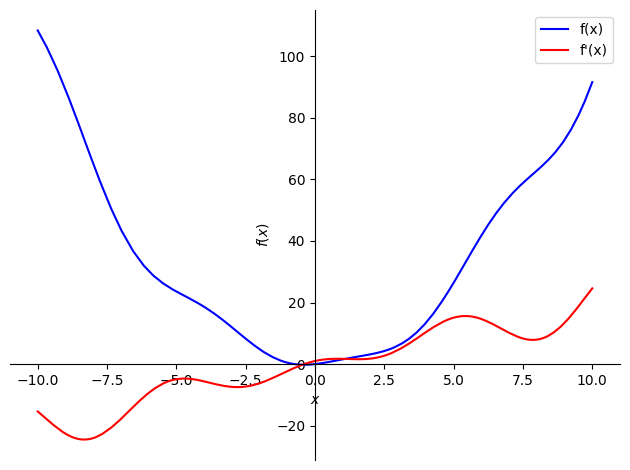

In [29]:
import sympy as sp # libreia para manejar expresiones simbolicas en lenguaje matematico
import sympy.plotting as syp # libreria para graficar funciones simbolicas 

x = sp.symbols('x') # declarar una variable simbolica
f = x**2 + x*sp.cos(x) # declarar una funcion simbolica
display(f) # imprimir la funcion simbolica
f_prime = sp.diff(f, x) # derivar la funcion simbolica 
display(f_prime) # imprimir la derivada de la funcion simbolica
p1 = syp.plot(f, show=False, line_color='blue', legend=True, label='f(x)') # graficar la funcion simbolica
p2 = syp.plot(f_prime, show=False, line_color='red', legend=True, label="f'(x)") # graficar la derivada de la funcion simbolica
p1.extend(p2) # unir las graficas
p1.show() 

In [30]:
sy.expand((x+2)**2) # expandir una expresion algebraica

In [31]:
sy.factor( x**2-2*x-8 ) # factorizar una expresion algebraica

In [32]:
sy.solve( x**2 + 2*x - 8, x) # resolver una ecuacion algebraica

In [33]:
a = sy.symbols("alpha") # declarar una variable simbolica
sy.solve( a*x**2 + 2*x - 8, x) # resolver una ecuacion algebraica con una variable simbolica


differential equations, solving $\frac{df}{dt}=f(t)+t$

In [37]:
t, C1 = sy.symbols("t C1") # declarar variables simbolicas
f = sy.symbols("f", cls=sy.Function) # declarar una funcion simbolica
dydt = f(t)+t # declarar una ecuacion diferencial
eq = dydt-sy.diff(f(t),t) # declarar una ecuacion diferencial: 0 = f(t) + t - f'(t) 
yt = sy.dsolve(eq, f(t)) # resolver la ecuacion diferencial  
display(yt)  # imprimir la solucion de la ecuacion diferencial

 systems of equations

In [19]:
sy.solve([x**2+y, 3*y-x]) # resolver un sistema de ecuaciones algebraicas

### `Sympy` to `Python` and `Numpy`

See [Sympy Numeric Computation](http://docs.sympy.org/latest/modules/numeric-computation.html)


In [38]:
f = (sy.sin(x) + x**2)/2 # declarar una funcion simbolica
f # imprimir la funcion simbolica

In [41]:
f.subs({x:10}) # evaluar la funcion simbolica

In [42]:
sy.N(f.subs({x:10})) # evaluar la funcion simbolica y convertir el resultado a un numero

In [43]:
f1 = sy.lambdify(x, f) # convertir la funcion simbolica a una funcion numerica
f1(10)

and a vectorized version

In [44]:
f2 = sy.lambdify(x, f, "numpy") # convertir la funcion simbolica a una funcion numerica

In [45]:
f2(10)

In [46]:
f2(np.array([10,2,3])) # evaluar la funcion numerica en un arreglo de numeros

array([49.72798944,  2.45464871,  4.57056   ])

the _lambdified_ version is faster, and the vectorized one is even faster

In [47]:
# evaluar la funcion simbolica y convertir el resultado a un numero 
%timeit sy.N(f.subs({x:10})) 

128 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [48]:
# evaluar la funcion numerica 
%timeit f1(10) 

2.19 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [49]:
# evaluar la funcion numerica en un rango de numeros
%timeit [f1(i) for i in range(1000)] 

2.04 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# evaluar la funcion numerica en un rango de numeros 
%timeit f2(np.arange(1000)) 

17.6 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Using `sympy` to obtain the gradient.

In [50]:
y = d.densidad_escamas.values # extraer la columna de densidad de escamas
X = np.r_[[[1]*len(d), d.longitud.values]].T # construir la matriz de diseño 

t0,t1 = sy.symbols("theta_0 theta_1") # declarar variables simbolicas
t0,t1 # imprimir las variables simbolicas

we first obtain the cost expression for a few summation terms, so that we can print it out and understand it

In [59]:
expr = 0
for i in range(10):
    expr += (X[i,0]*t0+X[i,1]*t1-y[i])**2
expr = expr/len(X)
expr

find `X[0]` and `y[0]` in the expression above, beware that you might get simplifications and reordering of the expression by `sympy`

In [60]:
y[:10]

array([ 8.81002719, 12.98047638,  9.50777126,  7.81259333,  8.81891411,
        8.07371798,  9.54390404,  7.15116822,  7.15939183,  7.50229833])

we can now simplify the expression, using `sympy` mechanics

In [61]:
expr = expr.simplify()
expr

we now build the full expression

In [66]:
def build_logisitic_regression_cost_expression(X,y):
    """
    Construir la expresion de la funcion de costo para regresion logistica
    """
    expr_cost = 0
    for i in range(len(X)):
        expr_cost += (X[i,0]*t0+X[i,1]*t1-y[i])**2/len(X)  
    expr_cost = expr_cost.simplify()
    return expr_cost

In [75]:
y = d.densidad_escamas.values # extraer la columna de densidad de escamas
X = np.r_[[[1]*len(d), d.longitud.values]].T # construir la matriz de diseño

expr_cost = build_logisitic_regression_cost_expression(X,y) # construir la expresion de la funcion de costo
expr_cost

In [76]:
# evaluar el tiempo de ejecucion de la funcion de costo
%timeit build_logisitic_regression_cost_expression(X,y) 

2.02 s ± 82.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


obtain derivatives symbolically

In [77]:
expr_dt0 = expr_cost.diff(t0) # derivar la funcion de costo con respecto a t0
expr_dt1 = expr_cost.diff(t1) # derivar la funcion de costo con respecto a t1
expr_dt0, expr_dt1 

and obtain regular Python so that we can use them in optimization 

In [78]:
s_cost = sy.lambdify([[t0,t1]], expr_cost, "numpy") # convertir la funcion simbolica a una funcion numerica

d0 = sy.lambdify([[t0,t1]], expr_dt0, "numpy") # convertir la funcion simbolica a una funcion numerica
d1 = sy.lambdify([[t0,t1]], expr_dt1, "numpy") # convertir la funcion simbolica a una funcion numerica
s_grad = lambda x: np.array([d0(x), d1(x)]) # construir el gradiente de la funcion de costo

and now we can minimize

In [79]:
r = minimize(s_cost, [0,0], jac=s_grad, method="BFGS") # minimizar la funcion de costo
r

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.7447662570799594
        x: [ 1.269e+01 -7.181e-01]
      nit: 9
      jac: [-1.738e-07 -9.269e-07]
 hess_inv: [[ 5.574e+00 -1.091e+00]
            [-1.091e+00  2.343e-01]]
     nfev: 10
     njev: 10

observe that hand derived functions and the ones obtained by `sympy` evaluate to the same values

In [84]:
t0 = np.random.random()*5+10
t1 = np.random.random()*4-3
t = np.r_[t0,t1]

print ("theta:",t)
print ("cost analytic:", n_cost(t))
print ("cost symbolic:", s_cost(t))

print ("gradient analytic:", n_grad(t))
print ("gradient symbolic:", s_grad(t))

theta: [12.89699613  0.74728335]
cost analytic: 56.60998627200412
cost symbolic: 56.60998627200411
gradient analytic: [14.0415393 71.5354079]
gradient symbolic: [14.0415393 71.5354079]


**And we are still using black box optimization!!!!**

## 3.2 - TF symbolic engine 

In [ ]:
# !wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
# import init; init.init(force_download=False); 

In [32]:
import numpy as np # libreria para manejar matrices y operaciones matematicas
import tensorflow as tf # libreria para manejar redes neuronales 
import matplotlib.pyplot as plt # libreria para graficar
import pandas as pd # libreria para manejar bases de datos en formato tabla
from progressbar import progressbar as pbar # importar la barra de progreso
%matplotlib inline 
%load_ext tensorboard 

from sklearn.datasets import * # importar la base de datos de sklearn
from content.local.lib import mlutils # importar libreria local para visualizar el espacio de caracteristicas
from IPython.display import Image # importar libreria para visualizar imagenes
tf.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.15.0'

### Tensorflow Dev Summit

the following images are screenshots of the publicly available material from conferences at the [TensorFLow Dev Summit](https://www.tensorflow.org/dev-summit)

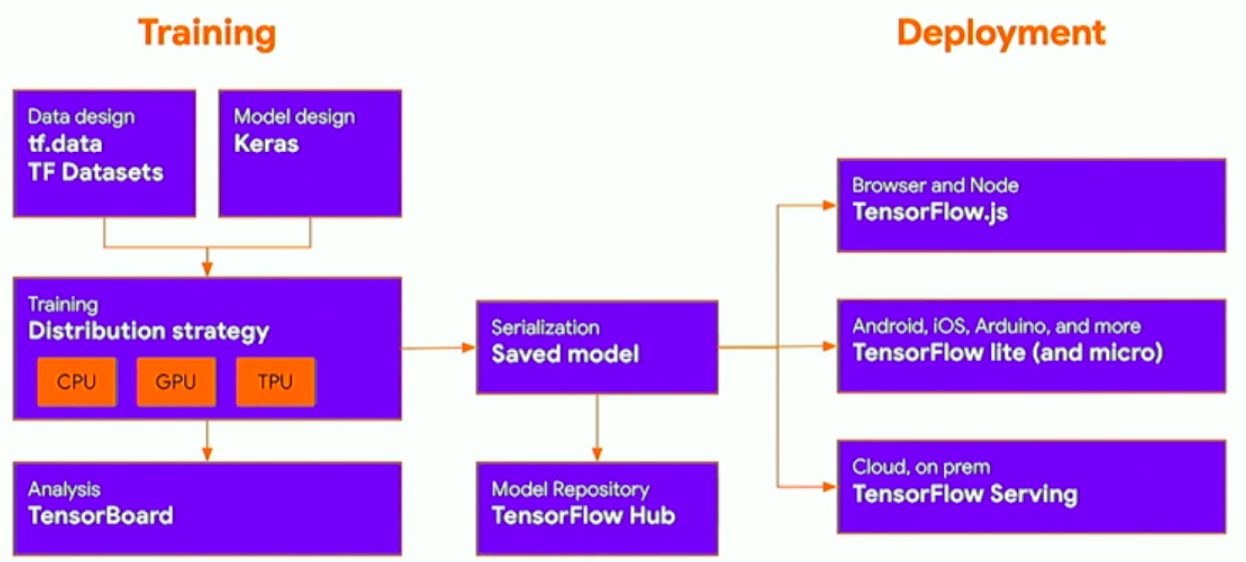

In [3]:
Image("content/local/imgs/tfCycle.png")

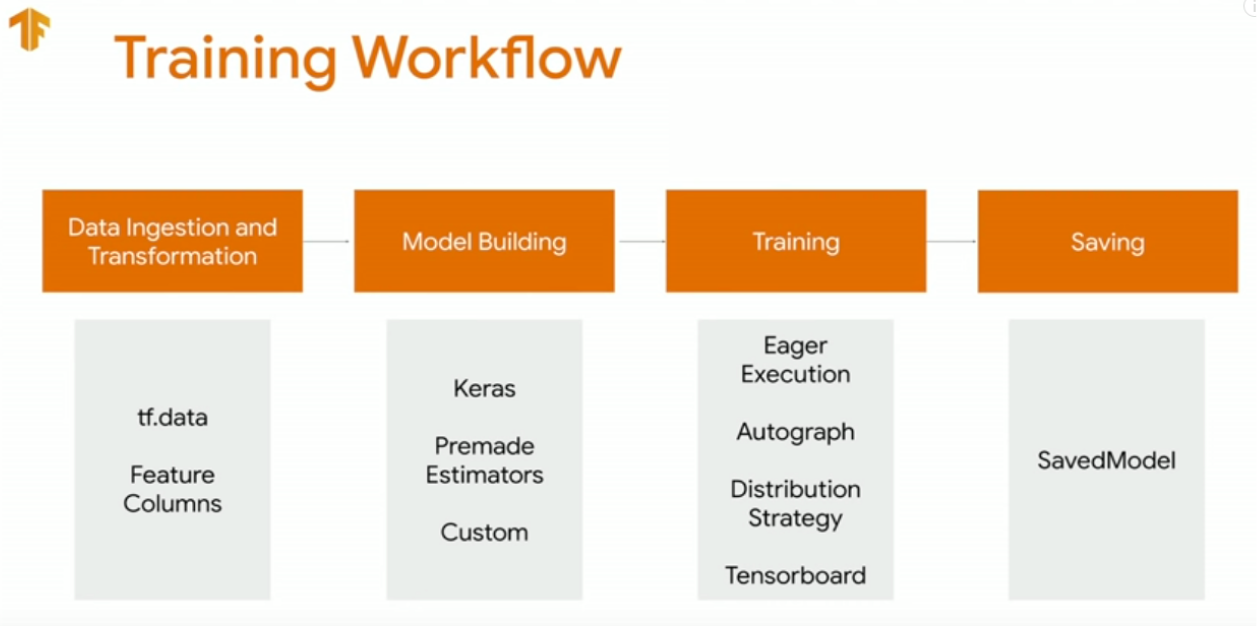

In [3]:
Image("content/local/imgs/tfTrainingWorkflow.png")

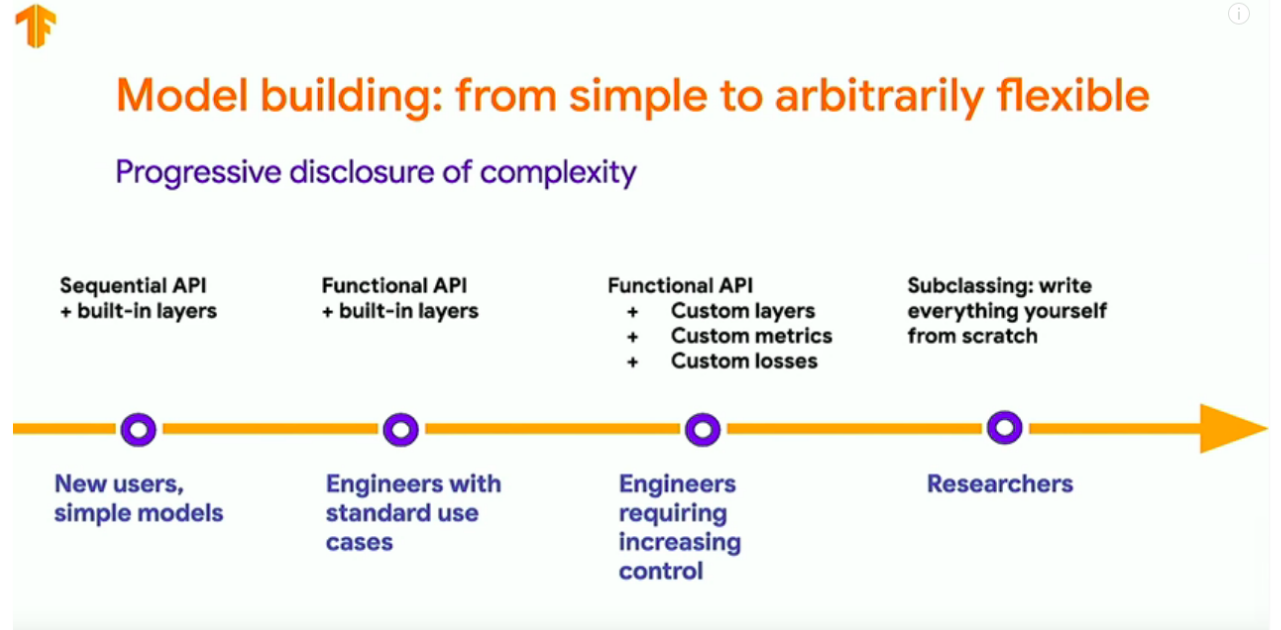

In [4]:
Image("content/local/imgs/tfAPIs.png")

### TF is a symbolic computing + optimization library for machine learning problems

ML expressions involve:

- variables representing data as n-dimensional objects
- variables representing parameters as n-dimensional objects
- mostly matrix operations (multiplications, convolutions, etc.)
- some non linear operations (activation functions)


**Recall** that in `sympy` we **FIRST** define expressions (a computational graph) and **THEN** we evaluate them feed concrete values.

Tensorflow **INTEGRATES** both aspects so that building computational graphs **LOOKS LIKE** writing regular Pytohn code as must as possible.

- a `tf.Variable` represents a **symbolic** variable, that **contains a value**


See:

- https://www.tensorflow.org/guide/keras/train_and_evaluate
- https://www.tensorflow.org/guide/keras/custom_layers_and_models
- https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit

In [9]:
x = tf.Variable(initial_value=[7], name="x", dtype=tf.float32) # declarar una variable
y = tf.Variable(initial_value=[9], name="y", dtype=tf.float32) # declarar una variable
f = x**2+y**3 # declarar una funcion
f

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([778.], dtype=float32)>

`f` is **SYMBOLIC EXPRESSION** (a `Tensor` in TF terms) that also contains a value attached to it.


for which TF can obtain gradients automatically. This might seem a rather akward way of obtaining the gradient (with `GradientTape`). The goal is that you **write code as in Python** and TF takes care of building the computational graph with it. 


In [5]:
with tf.GradientTape(persistent=True) as t: # declarar un contexto de cinta de gradiente
    f = x**2 + y**3 # declarar una funcion 
    
print(t.gradient(f, x), t.gradient(f, y)) # calcular el gradiente de la funcion con respecto a x y y
    

tf.Tensor([14.], shape=(1,), dtype=float32) tf.Tensor([243.], shape=(1,), dtype=float32)


In [6]:
print(t.gradient(f, [x,y])) # calcular el gradiente de la funcion con respecto a x y y


[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([14.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([243.], dtype=float32)>]


usually expressions are built within functions decorated with `@tf.function` for performance

In [7]:
@tf.function # decorador para convertir la funcion en un grafo de tensorflow
def myf(x,y):
    return x**2 + y**3

In [8]:
with tf.GradientTape(persistent=True) as t:
    f = myf(x,y)
    
print (t.gradient(f, x), t.gradient(f, y))


tf.Tensor([14.], shape=(1,), dtype=float32) tf.Tensor([243.], shape=(1,), dtype=float32)


In [9]:
import shutil # libreria para manejar archivos
try:
    shutil.rmtree("logs") # borrar el directorio de logs
except:
    pass
mlutils.make_graph(myf, x, y, logdir="logs") # visualizar el grafo de la funcion


In [ ]:
%tensorboard --logdir logs


### Tensors

in `Tensorflow` the notion of a Tensor is just a **symbolic multidimensional array**. Although, this is a recent simplified version of what always has been known as a tensor in differential geometry (see [https://bjlkeng.github.io/posts/tensors-tensors-tensors/](https://bjlkeng.github.io/posts/tensors-tensors-tensors/)).


Observe how Tensorflow naturally deals with multidimensional symbolic variables (Tensors)

$$\frac{1}{m} \sum (X\theta - y)^2$$

In [10]:
n = 3 # numero de observaciones 
X = tf.Variable(initial_value=[[2, 6], [3, 1], [4, 5]], name="X", dtype=tf.float32) # declarar una matriz de diseno 
w = tf.Variable(initial_value=[[-2],[1]], name="w", dtype=tf.float32) # declarar un vector de parametros
y = tf.Variable(initial_value=[[8],[2],[3]], name="y", dtype=tf.float32) # declarar un vector de etiquetas

with tf.GradientTape(persistent=True) as t:
    f = tf.reduce_mean((tf.matmul(X,w)-y)**2) # declarar la funcion de costo de regresion lineal
    
g = t.gradient(f, w) # calcular el gradiente de la funcion de costo con respecto a w
g

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-38.      ],
       [-48.666668]], dtype=float32)>

But a `tf.Tensor` is always a symbolic variable. In order to reconcile symbolic and execution worlds, `Tensorflow` **attaches** a value to each symbolic variable, and carries it forward when making derivations.

- `X`, `y` and `w` are Tensors that we define with a specific value
- `g` is a Tensor derived from `X`, `y` and `w` that have ALSO been evaluated with the corresponding values.

In [12]:
g.numpy()

array([[-38.      ],
       [-48.666668]], dtype=float32)

### Implementing linear regresion in TF


(150, 1) (150,)


Text(0, 0.5, 'densidad_escamas')

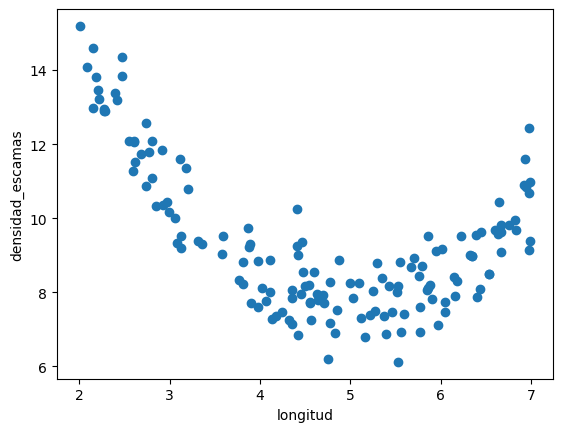

In [11]:
d = pd.read_csv("content/local/data/trilotropicos.csv")
y = d.densidad_escamas.values.astype(np.float32) # extraer la columna de densidad de escamas
X = np.r_[[d.longitud.values]].T.astype(np.float32) # extraer la columna de longitud y construir la matriz de diseno

print(X.shape, y.shape) # imprimir la dimension de la matriz de diseno y el vector de etiquetas
plt.scatter(d.longitud, d.densidad_escamas) # graficar la base de datos
plt.xlabel(d.columns[0]) # poner el nombre del eje x
plt.ylabel(d.columns[1]) # poner el nombre del eje y

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # declarar un modelo de regresion lineal
lr.fit(X,y) # ajustar el modelo de regresion lineal
lr.coef_, lr.intercept_ # imprimir los parametros del modelo de regresion lineal

(array([-0.71805906], dtype=float32), 12.689999)

### Version 1: raw low level with gradient descent
 
- beware of typing. `tensorflow` is very sensitive to numeric data types (`tf.float32`, `tf.float64`, etc.) Default types in `numpy` and `tensorflow` might not always be the same

In [31]:
from progressbar import progressbar as pbar # importar la barra de progreso

epochs = 4000 # numero de epocas
learning_rate = 0.01 # tasa de aprendizaje

# symbolic variables
w = tf.Variable(np.random.normal(size=(X.shape[-1], 1), scale=.6), dtype=tf.float32) # declarar un vector de parametros
b = tf.Variable(np.random.normal(size=(1,), scale=.6), dtype=tf.float32) # declarar un sesgo 
h = []

#optimization loop
for epoch in pbar(range(epochs)): # iterar sobre el numero de epocas
    with tf.GradientTape() as t: # declarar un contexto de cinta de gradiente
        preds = tf.matmul(X,w)+b # calcular las predicciones
        loss = tf.reduce_mean( (preds-y.reshape(-1,1))**2) # calcular la funcion de costo
        
    gw, gb = t.gradient(loss, [w, b]) # calcular el gradiente de la funcion de costo con respecto a w y b
    
    w.assign_sub(learning_rate * gw) # actualizar los parametros w
    b.assign_sub(learning_rate * gb) # actualizar el sesgo b
    
    h.append([gw.numpy()[0][0], gb.numpy()[0], w.numpy()[0][0], b.numpy()[0], loss.numpy()]) # guardar los parametros y la funcion de costo
h = np.r_[h] # convertir la lista a un arreglo de numpy
print (b.numpy(), w.numpy()) # imprimir el sesgo y los parametros del modelo de regresion lineal

  0% (0 of 4000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (25 of 4000) |                      | Elapsed Time: 0:00:00 ETA:   0:00:16
  1% (51 of 4000) |                      | Elapsed Time: 0:00:00 ETA:   0:00:16
  1% (78 of 4000) |                      | Elapsed Time: 0:00:00 ETA:   0:00:13
  2% (102 of 4000) |                     | Elapsed Time: 0:00:00 ETA:   0:00:13
  3% (140 of 4000) |                     | Elapsed Time: 0:00:00 ETA:   0:00:12
  4% (186 of 4000) |                     | Elapsed Time: 0:00:00 ETA:   0:00:11
  5% (231 of 4000) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:10
  7% (283 of 4000) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:10
  8% (329 of 4000) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  8% (355 of 4000) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:09
 10% (401 of 4000) |##                   | Elapsed Time: 0:00:01 ETA:   0:00:09
 11% (445 of 4000) |##                  

[12.678121] [[-0.7157252]]


(0.0, 50.0)

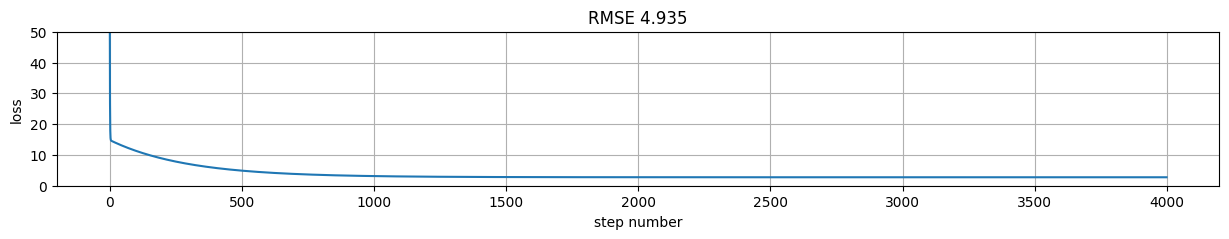

In [19]:
rmse = tf.reduce_mean((tf.matmul(X,w)+b-y)**2).numpy() # calcular el error cuadratico medio
plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(h[:,-1]); plt.xlabel("step number"); plt.ylabel("loss"); plt.grid(); # graficar la funcion de costo
plt.title("RMSE %.3f"%rmse) # poner el titulo de la grafica
plt.ylim(0,50) # poner los limites del eje y

### Version 2: using `tf.function` to speed up

In [ ]:
epochs = 4000 # numero de epocas

# initialize weights
w.assign(np.random.normal(size=(X.shape[-1],1)).astype(np.float32)*.6) # inicializar los parametros w
b.assign(np.random.normal(size=(1,)).astype(np.float32)) # inicializar el sesgo b

@tf.function # decorador para convertir la funcion en un grafo de tensorflow
def get_gradient(w, b, X, y): # funcion para calcular el gradiente de la funcion de costo
    with tf.GradientTape() as t: # declarar un contexto de cinta de gradiente
        preds = tf.matmul(X,w)+b # calcular las predicciones
        loss = tf.reduce_mean( (preds-y)**2) # calcular la funcion de costo
        
    gw, gb = t.gradient(loss, [w, b]) # calcular el gradiente de la funcion de costo con respecto a w y b
    return gw, gb, loss # retornar el gradiente y la funcion de costo

#optimization loop
h = [] # lista para guardar los parametros y la funcion de costo
for epoch in pbar(range(epochs)): # iterar sobre el numero de epocas
        
    gw, gb, loss = get_gradient(w, b, X, y.reshape(-1,1)) # calcular el gradiente de la funcion de costo
    
    w.assign_sub(learning_rate * gw) # actualizar los parametros w
    b.assign_sub(learning_rate * gb) # actualizar el sesgo b

    h.append([gw.numpy()[0][0], gb.numpy()[0], w.numpy()[0][0], b.numpy()[0], loss.numpy()]) # guardar los parametros y la funcion de costo
h = np.r_[h] # convertir la lista a un arreglo de numpy

print (b.numpy(), w.numpy()) # imprimir el sesgo y los parametros del modelo de regresion lineal

(0.0, 50.0)

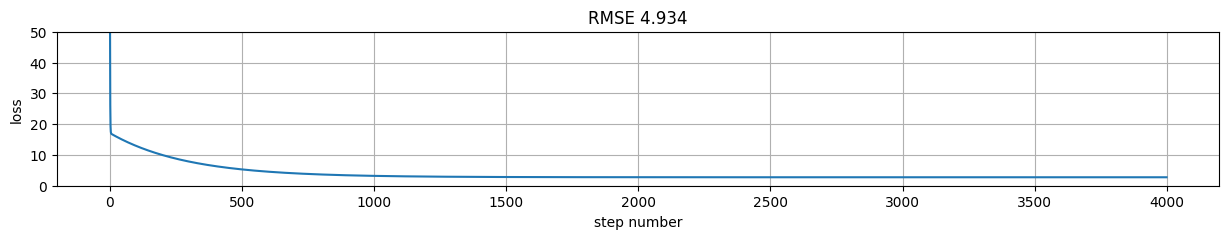

In [21]:
predictions = tf.matmul(X,w)+b # calcular las predicciones

rmse = tf.reduce_mean((predictions-y)**2).numpy() # calcular el error cuadratico medio
plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(h[:,-1]); plt.xlabel("step number"); plt.ylabel("loss"); plt.grid() # graficar la funcion de costo
plt.title("RMSE %.3f"%rmse) # poner el titulo de la grafica
plt.ylim(0,50) # poner los limites del eje y

### Version 3: using batches with random shuffling (stochastic gradient descent)

notice we tune the number of epochs as the number of weights updates increases

In [ ]:
#optimization loop
batch_size = 16 # tamano del lote
epochs = 400 # numero de epocas

# initialize weights
w.assign(np.random.normal(size=(X.shape[-1],1))*.6) # inicializar los parametros w
b.assign(np.random.normal(size=(1,))) # inicializar el sesgo b

h = [] # lista para guardar los parametros y la funcion de costo

for epoch in pbar(range(epochs)): # iterar sobre el numero de epocas
    
    idxs = np.random.permutation(len(X)) # permutar los indices de las observaciones
    
    for step in range(len(X)//batch_size+((len(X)%batch_size)!=0)): # iterar sobre el numero de lotes
        
        X_batch = X[idxs][step*batch_size:(step+1)*batch_size] # seleccionar el lote de observaciones
        y_batch = y[idxs][step*batch_size:(step+1)*batch_size] # seleccionar el lote de etiquetas
        
        gw, gb, loss = get_gradient(w, b, X_batch, y_batch.reshape(-1,1)) # calcular el gradiente de la funcion de costo

        w.assign_sub(learning_rate * gw) # actualizar los parametros w
        b.assign_sub(learning_rate * gb) # actualizar el sesgo b
        
        h.append([gw.numpy()[0][0], gb.numpy()[0], w.numpy()[0][0], b.numpy()[0], loss.numpy()]) # guardar los parametros y la funcion de costo
h = np.r_[h] # convertir la lista a un arreglo de numpy
print (b.numpy(), w.numpy()) # imprimir el sesgo y los parametros del modelo de regresion lineal

(0.0, 50.0)

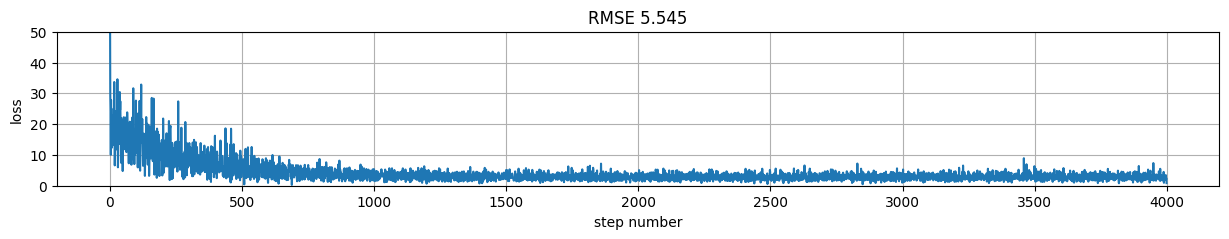

In [23]:
predictions = tf.matmul(X,w)+b # calcular las predicciones

rmse = tf.reduce_mean((predictions-y)**2).numpy() # calcular el error cuadratico medio
plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(h[:,-1]); plt.xlabel("step number"); plt.ylabel("loss"); plt.grid() # graficar la funcion de costo
plt.title("RMSE %.3f"%rmse) # poner el titulo de la grafica
plt.ylim(0,50)

### Version 4: packing up with Keras `class` API  and custom SGD

observe:

- the`build` method that is called by Keras whenever `input_shape` is known
- we use `add_weight` so that our model weights are known to the Keras model framework (`trainable_variables`, `get_weights`, etc.) 

see [here](https://www.tensorflow.org/guide/keras/custom_layers_and_models)

In [24]:
class LinearRegressionModel4(tf.keras.Model): # clase para regresion lineal
    
    def build(self, input_shape): # metodo para inicializar los parametros
        self.w = self.add_weight(shape=(input_shape[-1], 1), initializer='random_normal',
                                 trainable=True, dtype=tf.float32) # inicializar el vector de parametros
        
        self.b = self.add_weight(shape=(1,), initializer='random_normal',
                                 trainable=True, dtype=tf.float32) # inicializar el sesgo
        
    def call(self, inputs): # metodo para calcular las predicciones
        return tf.matmul(inputs, self.w) + self.b # calcular las predicciones
    
    @tf.function # decorador para convertir la funcion en un grafo de tensorflow
    def get_gradient(self, X, y): # metodo para calcular el gradiente de la funcion de costo
        with tf.GradientTape() as t: # declarar un contexto de cinta de gradiente
            loss = tf.reduce_mean( (self(X)-y)**2) # calcular la funcion de costo

        gw, gb = t.gradient(loss, [self.w, self.b]) # calcular el gradiente de la funcion de costo con respecto a w y b
        return gw, gb, loss # retornar el gradiente y la funcion de costo

    def fit(self, X,y, epochs, batch_size=16, learning_rate=0.01): # metodo para ajustar el modelo
        y = y.reshape(-1,1) # convertir el vector de etiquetas a una matriz
        self.h=[] # lista para guardar los parametros y la funcion de costo
        for epoch in pbar(range(epochs)): # iterar sobre el numero de epocas
            idxs = np.random.permutation(len(X)) # permutar los indices de las observaciones
            for step in range(len(X)//batch_size+((len(X)%batch_size)!=0)): # iterar sobre el numero de lotes
                X_batch = X[idxs][step*batch_size:(step+1)*batch_size]  # seleccionar el lote de observaciones
                y_batch = y[idxs][step*batch_size:(step+1)*batch_size]  # seleccionar el lote de etiquetas            

                gw, gb, loss = self.get_gradient(X_batch,y_batch) # calcular el gradiente de la funcion de costo
                self.w.assign_sub(learning_rate * gw) # actualizar los parametros w
                self.b.assign_sub(learning_rate * gb) # actualizar el sesgo b
                self.h.append([gw.numpy()[0][0], gb.numpy()[0], w.numpy()[0][0], b.numpy()[0], loss.numpy()]) # guardar los parametros y la funcion de costo
        self.h = np.r_[self.h] # convertir la lista a un arreglo de numpy


In [26]:
model = LinearRegressionModel4() # declarar un modelo de regresion lineal

observe that we can use the object directly on data to get predictions

In [33]:
model(X[:2]) # inicializar los parametros del modelo

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.08824938],
       [0.04489976]], dtype=float32)>

or with the  `.predict` method

In [34]:
model.predict(X[:2]) # calcular las predicciones del modelo

1/1 [==============================] - 0s 23ms/step


array([[0.08824938],
       [0.04489976]], dtype=float32)

In [35]:
model.trainable_variables # imprimir los parametros del modelo

[<tf.Variable 'linear_regression_model4_1/Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.02607325]], dtype=float32)>,
 <tf.Variable 'linear_regression_model4_1/Variable:0' shape=(1,) dtype=float32, numpy=array([-0.01127728], dtype=float32)>]

In [36]:
model.get_weights() # imprimir los parametros del modelo

[array([[0.02607325]], dtype=float32), array([-0.01127728], dtype=float32)]

and fit the model

In [ ]:
model.fit(X, y, epochs=400, batch_size=16) # ajustar el modelo de regresion lineal

In [38]:
model.b.numpy(), model.w.numpy()

(array([12.7051525], dtype=float32), array([[-0.6089771]], dtype=float32))

(0.0, 50.0)

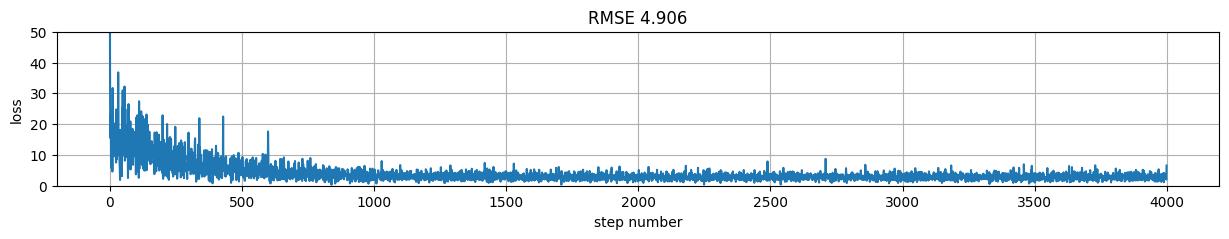

In [40]:
predictions = model(X) # calcular las predicciones del modelo

rmse = tf.reduce_mean((predictions-y)**2).numpy() # calcular el error cuadratico medio
plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(model.h[:,-1]); plt.xlabel("step number"); plt.ylabel("loss"); plt.grid() # graficar la funcion de costo
plt.title("RMSE %.3f"%rmse) # poner el titulo de la grafica
plt.ylim(0,50) # poner los limites del eje y

### Version 5: Sequential Keras model with standard loop

In [7]:
from tensorflow.keras import Sequential # importar la clase para modelos secuenciales
from tensorflow.keras.layers import Dense # importar la clase para capas densas
    
def get_model5(): # funcion para construir un modelo de regresion lineal
    model = Sequential() # declarar un modelo secuencial
    model.add(Dense(1, input_shape=(X.shape[-1],), activation="linear")) # agregar una capa densa
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
                  metrics=["mean_absolute_error"],
                  loss="mse") # compilar el modelo
# equivalent forms for loss    
#                  loss = lambda y_true, y_pred: tf.reduce_mean((y_true-y_pred)**2))
#                  loss="mean_squared_error")
#                  loss=tf.keras.metrics.mean_squared_error)
    return model # retornar el modelo

In [12]:
from sklearn.model_selection import train_test_split # importar la funcion para dividir la base de datos en entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X,y.reshape(-1,1), test_size=0.2) # dividir la base de datos en entrenamiento y validacion
X_train.shape, X_val.shape, y_train.shape, y_val.shape # imprimir la dimension de la base de datos de entrenamiento y validacion

((120, 1), (30, 1), (120, 1), (30, 1))

In [9]:
import shutil # libreria para manejar archivos
shutil.rmtree('logs') # borrar el directorio de logs
model = get_model5() # construir un modelo de regresion lineal

tb_callback = tf.keras.callbacks.TensorBoard('./logs', update_freq=1) # declarar un callback para visualizar el grafo de la funcion de costo
model.fit(X_train,y_train, epochs=100, batch_size=5, verbose=0,  
          callbacks=[tb_callback], validation_data=(X_val, y_val)) # ajustar el modelo de regresion lineal

model.weights # imprimir los parametros del modelo

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.7569699]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([12.539559], dtype=float32)>]

history is now logged only per epoch

In [11]:
model.history.history.keys() # imprimir las metricas del modelo

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

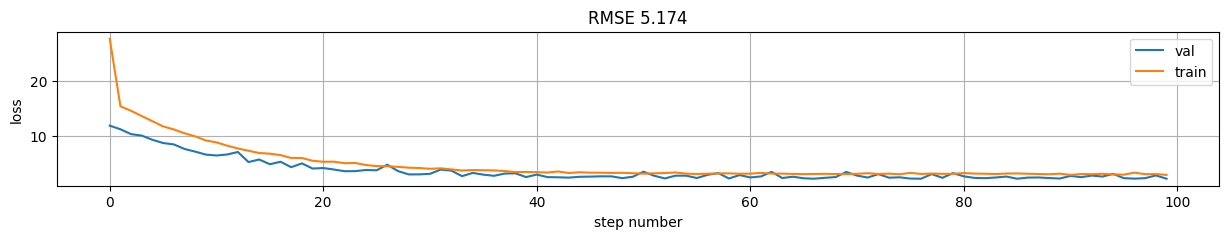

In [12]:
predictions = model(X) # calcular las predicciones del modelo
rmse = np.mean((predictions-y)**2) # calcular el error cuadratico medio

plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(model.history.history["val_loss"], label="val") # graficar la funcion de costo de validacion
plt.plot(model.history.history["loss"], label="train") # graficar la funcion de costo de entrenamiento
plt.xlabel("step number"); plt.ylabel("loss"); plt.grid() # poner los nombres de los ejes y la cuadricula
plt.title("RMSE %.3f"%rmse); plt.legend() # poner el titulo de la grafica y la leyenda

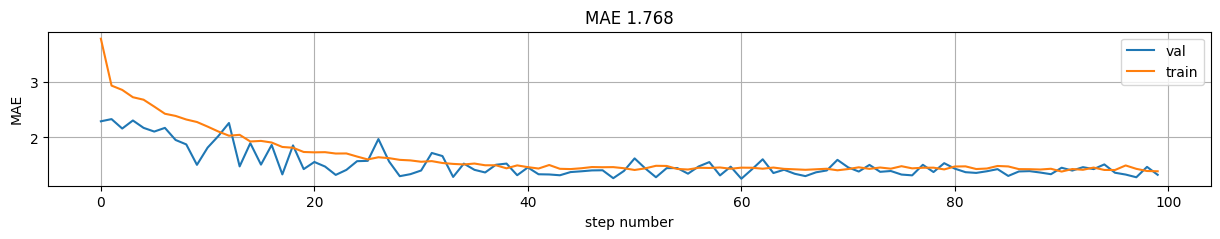

In [13]:
mae = np.mean(np.abs(predictions-y)) # calcular el error absoluto medio

plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(model.history.history["val_mean_absolute_error"], label="val") # graficar el error absoluto medio de validacion
plt.plot(model.history.history["mean_absolute_error"], label="train") # graficar el error absoluto medio de entrenamiento
plt.xlabel("step number"); plt.ylabel("MAE"); plt.grid() # poner los nombres de los ejes y la cuadricula
plt.title("MAE %.3f"%mae); plt.legend() # poner el titulo de la grafica y la leyenda

In [ ]:
%tensorboard --logdir logs

### Version 6: Custom model with Keras `class` API  and standard loop

In [13]:
class LinearRegressionModel6(tf.keras.Model): # clase para regresion lineal
    
    def build(self, input_shape): # metodo para inicializar los parametros
        self.w = self.add_weight(shape=(input_shape[-1], 1), 
                                 initializer='random_normal',
                                 trainable=True, dtype=np.float32) # inicializar el vector de parametros
        
        self.b = self.add_weight(shape=(1,),
                                 initializer='random_normal',
                                 trainable=True, dtype=np.float32) # inicializar el sesgo
        
    def call(self, inputs): # metodo para calcular las predicciones
        return tf.matmul(inputs, self.w) + self.b  # calcular las predicciones


In [5]:
model = LinearRegressionModel6() # declarar un modelo de regresion lineal

In [15]:
import shutil # libreria para manejar archivos
try: 
       shutil.rmtree('logs') # borrar el directorio de logs
except:
       pass
model = LinearRegressionModel6()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.02), 
           loss="mse", metrics=['mean_absolute_error'])

tb_callback = tf.keras.callbacks.TensorBoard('./logs', update_freq=1)


model.fit(X_train,y_train, epochs=100, batch_size=5, callbacks=[tb_callback], 
       verbose=0, validation_data=(X_val, y_val))

In [16]:
model.b.numpy(), model.w.numpy()[0] # imprimir el sesgo y los parametros del modelo de regresion lineal

(array([12.790426], dtype=float32), array([-0.80342007], dtype=float32))

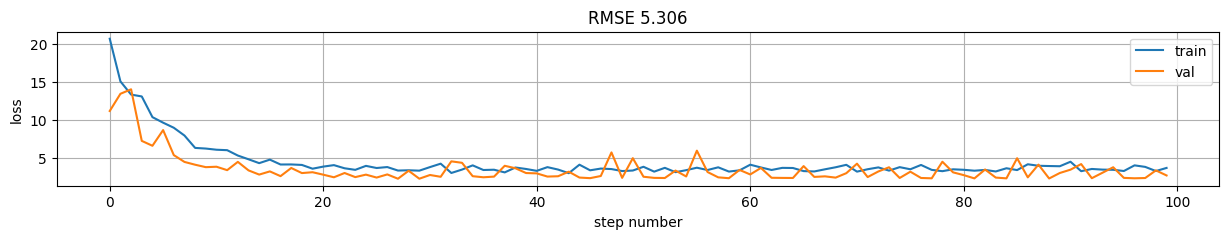

In [17]:
predictions = model(X) # calcular las predicciones del modelo
rmse = np.mean((predictions-y)**2) # calcular el error cuadratico medio

plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(model.history.history["loss"], label="train") # graficar la funcion de costo de entrenamiento
plt.plot(model.history.history["val_loss"], label="val") # graficar la funcion de costo de validacion 
plt.xlabel("step number"); plt.ylabel("loss"); plt.grid() # poner los nombres de los ejes y la cuadricula
plt.title("RMSE %.3f"%rmse); plt.legend() # poner el titulo de la grafica y la leyenda

### Version 7: Using `train_step` $\rightarrow$ control loss and gradients on a custom model.

In [18]:
class LinearRegressionModel7(tf.keras.Model): # clase para regresion lineal
    
    def build(self, input_shape): # metodo para inicializar los parametros
        self.w = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True, dtype=np.float32) # inicializar el vector de parametros
        
        self.b = self.add_weight(shape=(1,),
                                 initializer='random_normal',
                                 trainable=True, dtype=np.float32) # inicializar el sesgo
        
        self.loss_fn = tf.keras.metrics.MeanSquaredError() # inicializar la funcion de costo
        
    def call(self, inputs): # metodo para calcular las predicciones
        return tf.matmul(inputs, self.w) + self.b # calcular las predicciones

    def test_step(self, data): # metodo para calcular la funcion de costo en el conjunto de validacion
        # here we implement loss by hand
        return {'loss': tf.reduce_mean((self(X)-y)**2)  } # calcular la funcion de costo
    
    @tf.function # decorador para convertir la funcion en un grafo de tensorflow
    def train_step(self, data): # metodo para calcular la funcion de costo en el conjunto de entrenamiento
        X,y = data # extraer las observaciones y las etiquetas
        loss_fn = lambda y_true, y_preds: tf.reduce_mean((y_true-y_preds)**2) # declarar la funcion de costo
        with tf.GradientTape() as tape: # declarar un contexto de cinta de gradiente
            # we use tf.keras loss function (equivalent to test_step)
            loss_fn = tf.keras.metrics.mean_squared_error # declarar la funcion de costo
            loss = tf.reduce_mean(loss_fn(y, self(X))) # calcular la funcion de costo
            
        grads = tape.gradient(loss, self.trainable_variables) # calcular el gradiente de la funcion de costo
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables)) # actualizar los parametros del modelo
        
        return {'loss': loss} # retornar la funcion de costo

In [19]:
model = LinearRegressionModel7() # declarar un modelo de regresion lineal
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)) # compilar el modelo
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.035))
model.fit(X_train,y_train, epochs=400, batch_size=5, verbose=0, validation_data=(X_val, y_val)) # ajustar el modelo de regresion lineal

In [20]:
[i.numpy() for i in model.trainable_variables] # imprimir los parametros del modelo de regresion lineal

[array([[-0.7825604]], dtype=float32), array([12.839587], dtype=float32)]

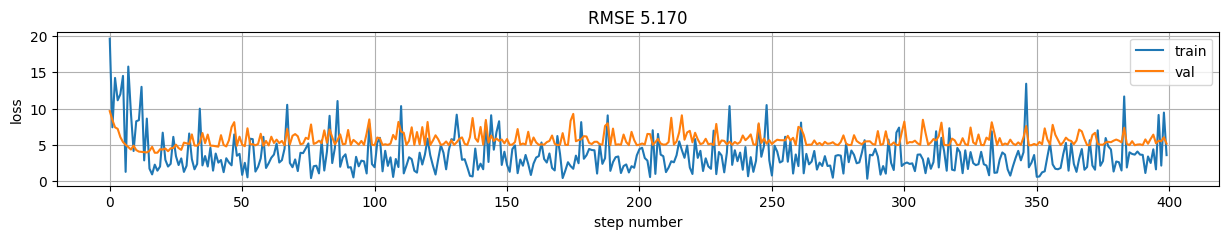

In [21]:
predictions = model(X) # calcular las predicciones del modelo
rmse = np.mean((predictions-y)**2) # calcular el error cuadratico medio

plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(model.history.history["loss"], label="train") # graficar la funcion de costo de entrenamiento
plt.plot(model.history.history["val_loss"], label="val") # graficar la funcion de costo de validacion
plt.xlabel("step number"); plt.ylabel("loss"); plt.grid() # poner los nombres de los ejes y la cuadricula
plt.title("RMSE %.3f"%rmse); plt.legend() # poner el titulo de la grafica y la leyenda

### Version 8: Using `train_step` $\rightarrow$ control loss and gradients on a standard model.

observe that:

- we use a standard `Dense` layer, 
- we use a custom loss function and `optimizer.apply_gradients`

In [22]:

class CustomModel(tf.keras.Model): # clase para regresion lineal
    
    def test_step(self, data): # metodo para calcular la funcion de costo en el conjunto de validacion
        return {'loss': tf.reduce_mean((self(X)-y)**2)}     # calcular la funcion de costo
    
    @tf.function # decorador para convertir la funcion en un grafo de tensorflow
    def train_step(self, data): # metodo para calcular la funcion de costo en el conjunto de entrenamiento
        X,y = data # extraer las observaciones y las etiquetas
        
        with tf.GradientTape() as tape: # declarar un contexto de cinta de gradiente
            y_pred = self(X, training=True) # calcular las predicciones
            loss_value = tf.reduce_mean((y_pred-y)**2) # calcular la funcion de costo
            
        grads = tape.gradient(loss_value, self.trainable_variables) # calcular el gradiente de la funcion de costo
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables)) # actualizar los parametros del modelo
        
        return {'loss': loss_value} # retornar la funcion de costo


In [23]:
from tensorflow.keras.layers import Dense, Input # importar la clase para capas densas y la clase para la capa de entrada
    
def get_model8(): # funcion para construir un modelo de regresion lineal
    
    inputs = tf.keras.layers.Input(shape=(1)) # declarar la capa de entrada
    outputs = tf.keras.layers.Dense(1, activation="linear")(inputs) # declarar la capa de salida
    
    model = CustomModel(inputs, outputs) # declarar un modelo de regresion lineal
    
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)) # compilar el modelo
    return model # retornar el modelo

our custom loop (**for any model** !!!)

In [24]:
model = get_model8() # construir un modelo de regresion lineal
model.summary() # imprimir la arquitectura del modelo

Model: "custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.weights # imprimir los parametros del modelo

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.27374697]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [26]:
model.trainable_variables # imprimir los parametros del modelo

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.27374697]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [27]:
model.fit(X_train,y_train.reshape(-1,1), epochs=400, batch_size=5, verbose=0, validation_data=(X_val, y_val)) # ajustar el modelo de regresion lineal

In [ ]:
model.trainable_variables

[<tf.Variable 'dense_15/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.4444475]], dtype=float32)>,
 <tf.Variable 'dense_15/bias:0' shape=(1,) dtype=float32, numpy=array([11.331306], dtype=float32)>]

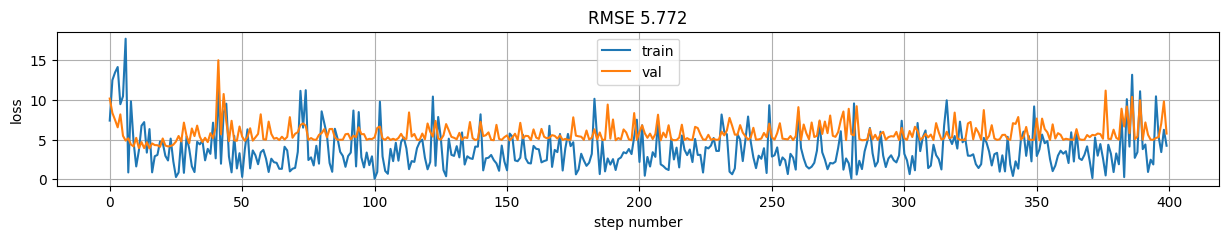

In [28]:
predictions = model(X) # calcular las predicciones del modelo
rmse = np.mean((predictions-y)**2) # calcular el error cuadratico medio

plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(model.history.history["loss"], label="train") # graficar la funcion de costo de entrenamiento
plt.plot(model.history.history["val_loss"], label="val") # graficar la funcion de costo de validacion
plt.xlabel("step number"); plt.ylabel("loss"); plt.grid()   # poner los nombres de los ejes y la cuadricula
plt.title("RMSE %.3f"%rmse); plt.legend()   # poner el titulo de la grafica y la leyenda

### Version 9: using `train_on_batch` $\rightarrow$ control data

In [34]:
epochs = 400 # numero de epocas
batch_size = 5 # tamano del lote

In [ ]:
model = get_model8() # construir un modelo de regresion lineal
h = []   # lista para guardar los parametros y la funcion de costo
for epoch in pbar(range(epochs)): # iterar sobre el numero de epocas
    idxs = np.random.permutation(len(X)) # permutar los indices de las observaciones
    for step in range(len(X)//batch_size+((len(X)%batch_size)!=0)): # iterar sobre el numero de lotes
        X_batch = X[idxs][step*batch_size:(step+1)*batch_size] # seleccionar el lote de observaciones
        y_batch = y[idxs][step*batch_size:(step+1)*batch_size] # seleccionar el lote de etiquetas         
        model.train_on_batch(X_batch, y_batch) # ajustar el modelo de regresion lineal
    h.append(model.test_step([X_batch, y_batch])['loss']) # guardar la funcion de costo

In [36]:
model.trainable_variables # imprimir los parametros del modelo de regresion lineal

[<tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.09256713]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([10.0491905], dtype=float32)>]

Text(0.5, 1.0, 'RMSE 3.933')

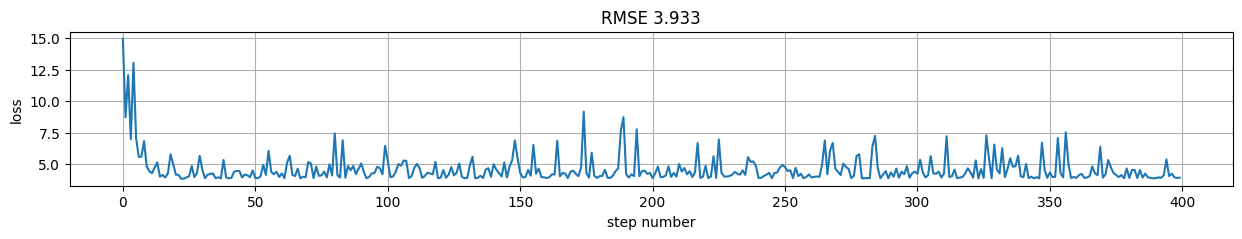

In [39]:
predictions = model(X) # calcular las predicciones del modelo

rmse = tf.reduce_mean((predictions-y)**2).numpy() # calcular el error cuadratico medio
plt.figure(figsize=(15,2)) # declarar el tamano de la figura
plt.plot(h); plt.xlabel("step number"); plt.ylabel("loss"); plt.grid() # graficar la funcion de costo 
plt.title("RMSE %.3f"%rmse) # poner el titulo de la grafica

## 3.3 - Using `tf.function`

In [ ]:
# !wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
# import init; init.init(force_download=False); 

In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext tensorboard

from sklearn.datasets import *
from content.local.lib import mlutils
tf.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.15.0'

### `tf.function` automatically converts pythonic code to a computational graph, using Tensors

In [42]:
def f(x):
    return x**2 + x*3
f(2)

10

In [43]:
@tf.function
def f(x):
    return x**2 + x*3
f(2)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

and also works with a symbolic tensor

In [45]:
x = tf.Variable(3.) # declarar una variable 
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

a `tf.function` is **traced** (converted to computation graph) the first time it is executed, then it is cached **IF IT IS REUSED WITH THE SAME TF VARIABLES**

In [46]:
@tf.function  
def f47(t):
    print('Tracing!')
    tf.print('Executing')  
    return t**2 + t*47

In [47]:
f47(2)

Tracing!
Executing


<tf.Tensor: shape=(), dtype=int32, numpy=98>

In [48]:
f47(2)

Executing


<tf.Tensor: shape=(), dtype=int32, numpy=98>

observe that if the type changes, the function is **traced** again since a different computational graph must be created

In [51]:
x = tf.Variable(2, dtype=tf.float32)
f47(x)

Executing


<tf.Tensor: shape=(), dtype=float32, numpy=98.0>

In [52]:
x.assign(3.4)
f47(x)

Executing


<tf.Tensor: shape=(), dtype=float32, numpy=171.36>

tracing happens for **EACH VARIABLE**

In [53]:
y = tf.Variable(2, dtype=tf.float32) # declarar una variable
f47(y)

Executing


<tf.Tensor: shape=(), dtype=float32, numpy=98.0>

In [54]:
f47(y)

Executing


<tf.Tensor: shape=(), dtype=float32, numpy=98.0>

In [55]:
f47(x)

Executing


<tf.Tensor: shape=(), dtype=float32, numpy=171.36>

In [56]:
x = tf.Variable(3, dtype=tf.int32)
f47(x)

Tracing!
Executing


<tf.Tensor: shape=(), dtype=int32, numpy=150>

In [57]:
x.assign(9)
f47(x)

Executing


<tf.Tensor: shape=(), dtype=int32, numpy=504>

In [59]:
print (f47.pretty_printed_concrete_signatures())

Input Parameters:
  t (POSITIONAL_OR_KEYWORD): Literal[2]
Output Type:
  TensorSpec(shape=(), dtype=tf.int32, name=None)
Captures:
  None

Input Parameters:
  t (POSITIONAL_OR_KEYWORD): VariableSpec(shape=(), dtype=tf.float32, trainable=True, alias_id=0)
Output Type:
  TensorSpec(shape=(), dtype=tf.float32, name=None)
Captures:
  None

Input Parameters:
  t (POSITIONAL_OR_KEYWORD): VariableSpec(shape=(), dtype=tf.int32, trainable=True, alias_id=0)
Output Type:
  TensorSpec(shape=(), dtype=tf.int32, name=None)
Captures:
  None


observe the actual generated code by `tf.autograph`

In [61]:
print(tf.autograph.to_code(f47.python_function))

def tf__f47(t):
    with ag__.FunctionScope('f47', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        ag__.ld(print)('Tracing!')
        ag__.converted_call(ag__.ld(tf).print, ('Executing',), None, fscope)
        try:
            do_return = True
            retval_ = ag__.ld(t) ** 2 + ag__.ld(t) * 47
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



### performance of `tf.function`

In [63]:
def f1(x):
    return np.mean(x**2 + x*3)

def f11(x):
    return x**2 + x*3

@tf.function
def f2(x):
    return np.mean(x**2+x*3)

def f3(x):
    return tf.reduce_mean(x**2+x**3)

@tf.function
def f4(x):
    return tf.reduce_mean(x**2+x**3)

@tf.function
def f5(x):
    return f3(x)

In [64]:
X = np.random.random(size=(1000,20)).astype(np.float32)
tX = tf.Variable(X, dtype=tf.float32)

In [65]:
# f2(X) --> error, why?
f1(X), f3(X), f4(X), f5(X)

(1.8443787,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5896094>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5896094>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5896094>)

In [67]:
f1(tX), f3(tX), f4(tX), f5(tX)

(1.8443787,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5896094>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5896094>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5896094>)

In [68]:
# but
f11(tX)

<tf.Tensor: shape=(1000, 20), dtype=float32, numpy=
array([[2.646293  , 0.10703953, 2.3692765 , ..., 0.92707306, 1.1509225 ,
        1.9570191 ],
       [0.75823736, 2.0753973 , 3.885082  , ..., 1.9633687 , 2.5552664 ,
        2.7613182 ],
       [0.3584085 , 2.5427556 , 0.3213684 , ..., 0.02303439, 0.44357198,
        1.5083246 ],
       ...,
       [0.3134758 , 2.9324768 , 0.43945268, ..., 2.813821  , 2.8550322 ,
        3.8760376 ],
       [0.6584308 , 0.6036623 , 2.5690026 , ..., 2.1261873 , 2.6723847 ,
        2.1682832 ],
       [0.6471792 , 2.8590481 , 2.22329   , ..., 0.9097551 , 3.9466283 ,
        0.4769617 ]], dtype=float32)>

In [70]:
def f1(x):
    return np.mean(x**2 + x*3)

%timeit f1(X)

30.2 µs ± 3.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [71]:
%timeit f1(tX)

787 µs ± 53.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [72]:
def f3(x):
    return tf.reduce_mean(x**2+x**3)

%timeit f3(tX)

1.29 ms ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [73]:
@tf.function
def f4(x):
    return tf.reduce_mean(x**2+x**3)

%timeit f4(tX)

367 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [74]:
%timeit f4.python_function(tX)

1.32 ms ± 66.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [75]:
@tf.function
def f5(x):
    return f3(x)

%timeit f5(tX)

366 µs ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Underlying `concrete` functions are actual TF graphs with no polymorphism, tied to specific input types

`tf.function` maps python polymorphism to a set of different underlying concrete functions

In [76]:
@tf.function
def f(x):
    return x+x

In [77]:
f(10), f(10.), f("a")

(<tf.Tensor: shape=(), dtype=int32, numpy=20>,
 <tf.Tensor: shape=(), dtype=int32, numpy=20>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'aa'>)

observe different hash codes for each concrete function

In [79]:
fs = f.get_concrete_function(tf.TensorSpec(shape=None, dtype=tf.string))
fs, fs(tf.constant("aa"))

(<ConcreteFunction (x: TensorSpec(shape=<unknown>, dtype=tf.string, name=None)) -> TensorSpec(shape=<unknown>, dtype=tf.string, name=None) at 0x221CD83AC40>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'aaaa'>)

In [80]:
fi = f.get_concrete_function(tf.TensorSpec(shape=None, dtype=tf.int32))
fi, fi(tf.constant(1))

(<ConcreteFunction (x: TensorSpec(shape=<unknown>, dtype=tf.int32, name=None)) -> TensorSpec(shape=<unknown>, dtype=tf.int32, name=None) at 0x221CEE76280>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

In [82]:
ff = f.get_concrete_function(tf.TensorSpec(shape=None, dtype=tf.float32))
ff, ff(tf.constant(1.))

(<ConcreteFunction (x: TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)) -> TensorSpec(shape=<unknown>, dtype=tf.float32, name=None) at 0x221CD879130>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>)

### `tf.function` with `keras` layers

In [85]:
import numpy as np
np.random.seed(0) # fijar la semilla para reproducibilidad 
data = np.random.randn(3, 2) # generar datos aleatorios 
data    

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788]])

In [86]:
inputer = tf.keras.layers.InputLayer(input_shape=(2)) # declarar la capa de entrada
denser1 = tf.keras.layers.Dense(4, activation='relu') # declarar la capa oculta 
denser2 = tf.keras.layers.Dense(1, activation='sigmoid') # declarar la capa de salida

observe that, in eager mode, layers graphs are created as their code is being executed

In [ ]:
def model_1(data): # funcion para construir un modelo
    x = inputer(data) # pasar las observaciones por la capa de entrada
    x = denser1(x)   # pasar las observaciones por la capa oculta
    print('After the first layer:', x)
    out = denser2(x) # pasar las observaciones por la capa de salida
    print('After the second layer:', out)
    return out

print('Model output:\n', model_1(data)) # imprimir las predicciones del modelo
print("--")
print('Model output:\n', model_1(data+1)) # imprimir las predicciones del modelo       

After the first layer: tf.Tensor(
[[0.        0.        0.        0.       ]
 [1.1272627 0.        1.5222576 0.       ]
 [0.        0.        0.        1.0462083]], shape=(3, 4), dtype=float32)
After the second layer: tf.Tensor(
[[0.5       ]
 [0.8619154 ]
 [0.61063063]], shape=(3, 1), dtype=float32)
Model output:
 tf.Tensor(
[[0.5       ]
 [0.8619154 ]
 [0.61063063]], shape=(3, 1), dtype=float32)
--
After the first layer: tf.Tensor(
[[0.27164382 0.         0.         0.        ]
 [1.5170838  0.         1.8968623  0.        ]
 [0.         0.         0.         0.18906634]], shape=(3, 4), dtype=float32)
After the second layer: tf.Tensor(
[[0.5418302 ]
 [0.9130416 ]
 [0.52031773]], shape=(3, 1), dtype=float32)
Model output:
 tf.Tensor(
[[0.5418302 ]
 [0.9130416 ]
 [0.52031773]], shape=(3, 1), dtype=float32)


however, with `tf.function`, **FIRST** the function is **traced** resulting in a computational graph, which is what is **THEN** used in subsequent calls

In [87]:
@tf.function
def model_2(data):  # funcion para construir un modelo
    x = inputer(data) # pasar las observaciones por la capa de entrada
    x = denser1(x)  # pasar las observaciones por la capa oculta
    print('After the first layer:', x)
    out = denser2(x) # pasar las observaciones por la capa de salida
    print('After the second layer:', out)
    return out  


print('Model\'s output:', model_2(data))    # imprimir las predicciones del modelo
print('--')
print('Model\'s output:', model_2(data+1))  # imprimir las predicciones del modelo

After the first layer: Tensor("dense_6/Relu:0", shape=(3, 4), dtype=float32)
After the second layer: Tensor("dense_7/Sigmoid:0", shape=(3, 1), dtype=float32)
After the first layer: Tensor("dense_6/Relu:0", shape=(3, 4), dtype=float32)
After the second layer: Tensor("dense_7/Sigmoid:0", shape=(3, 1), dtype=float32)
Model's output: tf.Tensor(
[[0.5720638 ]
 [0.59762573]
 [0.64086175]], shape=(3, 1), dtype=float32)
--
Model's output: tf.Tensor(
[[0.6328922 ]
 [0.65699923]
 [0.5984315 ]], shape=(3, 1), dtype=float32)


`tf.function` usually requires less compute time, since in eager mode, everytime the function is called the graph is created

In [88]:
def model_1(data):
    x = inputer(data)
    x = denser1(x)
    out = denser2(x)
    return out

@tf.function
def model_2(data):
    x = inputer(data)
    x = denser1(x)
    out = denser2(x)
    return out

In [89]:
%timeit model_1(data)

1.66 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [90]:
%timeit model_2(data)

538 µs ± 36.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### including graphs in upstream functions. 

observe how we compute the gradient of a computational graph:

- with `model_1` the graph is generated eagerly each time the function is called
- with `model_2` the graph is only generated in the first call

In [91]:
def g1(data):
    with tf.GradientTape() as t:
        y = model_1(data)

    return t.gradient(y, denser1.variables)

def g2(data):
    with tf.GradientTape() as t:
        y = model_2(data)

    return t.gradient(y, denser1.variables)

g2(data), g1(data)



([<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
  array([[ 0.07832347,  0.82448745,  0.04135645,  0.27809915],
         [ 0.02940758,  0.30956465,  0.03947328, -0.14552702]],
        dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.05107852, 0.53768814, 0.0300795 , 0.14891058], dtype=float32)>],
 [<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
  array([[ 0.07832347,  0.82448745,  0.04135644,  0.27809915],
         [ 0.02940758,  0.30956465,  0.03947328, -0.14552702]],
        dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.05107852, 0.53768814, 0.0300795 , 0.14891058], dtype=float32)>])

In [92]:
%timeit g1(data)

2.84 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [93]:
%timeit g2(data)

1.54 ms ± 39.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


however, even in `g2` the gradient graph is still computed eagerly.

if we wrap either function, now everything is a cached computational graph.

In [94]:
fg1 = tf.function(g1)
%timeit fg1(data)

559 µs ± 37.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [95]:
fg2 = tf.function(g2)
%timeit fg2(data)

546 µs ± 35.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 3.4 - Batch normalization

In [ ]:
# !wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
# import init; init.init(force_download=False); 

In [97]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext tensorboard

from sklearn.datasets import *
from content.local.lib import mlutils
tf.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.15.0'



### Covariate shift

Change of distribution of input to a function:

- in input data it happens when using new data
- in intermediate layers happens **ALSO** when previous layers change weights when training.


### Covariate shift during training

Observe how we use TF Low Level API and custom optimization to see the covariate shift during training

- this could have been done also with the high level API and custom tensorboard summarizers

**We are using again a small dataset based on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)**

In [ ]:
!wget -nc https://s3.amazonaws.com/rlx/mini_cifar.h5

In [108]:
import h5py # libreria para manejar bases de datos en formato h5
with h5py.File('mini_cifar.h5','r') as h5f: # abrir el archivo en modo lectura
    x_cifar = h5f["x"][:]   # extraer las imagenes
    y_cifar = h5f["y"][:]  # extraer las etiquetas
len(x_cifar), x_cifar.shape, y_cifar.shape # imprimir el numero de imagenes y la dimension de las imagenes y las etiquetas

(3004, (3004, 32, 32, 3), (3004,))

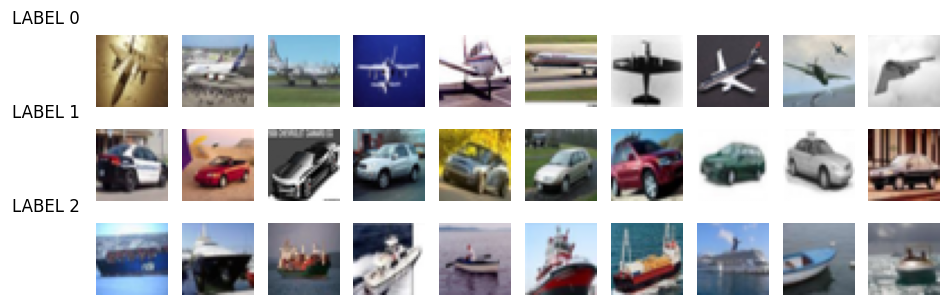

In [107]:
mlutils.show_labeled_image_mosaic(x_cifar, y_cifar) # visualizar las imagenes

In [109]:
print(np.min(x_cifar), np.max(x_cifar)) # imprimir el valor minimo y maximo de las imagenes  

0.0 1.0


In [110]:
from sklearn.model_selection import train_test_split # importar la funcion para dividir la base de datos en entrenamiento y validacion

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x_cifar, y_cifar, test_size=.25) # dividir la base de datos en entrenamiento y validacion
num_classes = len(np.unique(y_train)) # calcular el numero de clases
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape) 
print("\ndistribution of train classes")
print(pd.Series(y_train).value_counts())
print("\ndistribution of test classes")
print(pd.Series(y_test).value_counts())
print("\nnum classes", num_classes)
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)



(2253, 32, 32, 3) (2253,) (751, 32, 32, 3) (751,)

distribution of train classes
2    768
0    760
1    725
Name: count, dtype: int64

distribution of test classes
2    257
1    249
0    245
Name: count, dtype: int64

num classes 3


flatten data

In [112]:
x_trainf = np.r_[[i.flatten() for i in x_train]] # convertir las imagenes a un arreglo de numpy   
x_testf  = np.r_[[i.flatten() for i in x_test]] # convertir las imagenes a un arreglo de numpy
x_trainf.shape, x_testf.shape # imprimir la dimension de las imagenes

((2253, 3072), (751, 3072))

#### Set up a model with Keras and train

In [113]:
from tensorflow.keras import Model # importar la clase para modelos
from tensorflow.keras.activations import relu, sigmoid, tanh, linear, softmax # importar las funciones de activacion
from progressbar import progressbar as pbar # importar la barra de progreso
from scipy.stats import gaussian_kde # importar la funcion para ajustar una distribucion gaussiana

class MyModel(Model):
            
    def build(self, input_shape): # metodo para inicializar los parametros
        
        self.w1 = self.add_weight(shape=(input_shape[-1], 100), initializer='random_normal', trainable=True, dtype=tf.float32) # inicializar los parametros w1
        self.b1 = self.add_weight(shape=(100, ), initializer='random_normal', trainable=True, dtype=tf.float32)  # inicializar el sesgo b1       
        
        self.w2 = self.add_weight(shape=(100, 3), initializer='random_normal', trainable=True, dtype=tf.float32)    # inicializar los parametros w2
        self.b2 = self.add_weight(shape=(3, ), initializer='random_normal', trainable=True, dtype=tf.float32)    # inicializar el sesgo b2     
        
    @tf.function
    def get_z1(self, X): # metodo para calcular la salida de la primera capa
        r = tf.matmul(X,self.w1)+self.b1 
        return r
    
    @tf.function
    def get_a1(self, X): # metodo para calcular la activacion de la primera capa
        r = tf.tanh(self.get_z1(X))
        return r

    @tf.function
    def get_z2(self, X): # metodo para calcular la salida de la segunda capa
        a1 = self.get_a1(X)
        r = tf.matmul(a1,self.w2)+self.b2
        return r
        
    @tf.function
    def get_a2(self, X): # metodo para calcular la activacion de la segunda capa
        return softmax(self.get_z2(X))

    @tf.function
    def call(self, X): # metodo para calcular las predicciones
        a2 = self.get_a2(X)        
        return a2
        
    @tf.function
    def train_step(self, X,y): # metodo para calcular la funcion de costo
        preds = model(X) # calcular las predicciones
        with tf.GradientTape() as tape: # declarar un contexto de cinta de gradiente
            loss_value = tf.reduce_mean(self.loss(model(X), y)) # calcular la funcion de costo
        grads = tape.gradient(loss_value, self.trainable_variables) # calcular el gradiente de la funcion de costo

        self.optimizer.apply_gradients(zip(grads, self.trainable_variables)) # actualizar los parametros del modelo
        return loss_value

    def fit(self, X,y, epochs=10, batch_size=32): # metodo para ajustar el modelo 
        self.hloss = [] # lista para guardar la funcion de costo
        self.hz1, self.hz2 = [], [] # lista para guardar la salida de las capas
        self.ha1, self.ha2 = [], [] # lista para guardar la activacion de las capas
        for epoch in pbar(range(epochs)): # iterar sobre el numero de epocas
            idxs = np.random.permutation(len(X)) # permutar los indices de las observaciones
            for step in range(len(X)//batch_size+((len(X)%batch_size)!=0)): # iterar sobre el numero de lotes  
                
                X_batch = X[idxs][step*batch_size:(step+1)*batch_size] # seleccionar el lote de observaciones
                y_batch = y[idxs][step*batch_size:(step+1)*batch_size] # seleccionar el lote de etiquetas  
                loss_value = self.train_step(X_batch, y_batch) # calcular la funcion de costo
                self.hz1.append(self.get_z1(X_batch).numpy().flatten()) # guardar la salida de la primera capa
                self.hz2.append(self.get_z2(X_batch).numpy().flatten()) # guardar la salida de la segunda capa
                self.ha1.append(self.get_a1(X_batch).numpy().flatten())  # guardar la activacion de la primera capa
                self.ha2.append(self.get_a2(X_batch).numpy().flatten()) # guardar la activacion de la segunda capa
                self.hloss.append(loss_value) # guardar la funcion de costo
    
    def score(self, X, y): # metodo para calcular la precision del modelo
        return np.mean(model.predict(X).argmax(axis=1) == y)    # calcular la precision del modelo 
    
    def plot_hist(self): # metodo para visualizar el historial de la funcion de costo
        def plot_z_history(s): # funcion para visualizar la salida de las capas
            s = s[::5] # seleccionar cada 5 elementos
            for i,data in enumerate(pbar(s)): # iterar sobre la salida de las capas
                kde = gaussian_kde(data) # ajustar una distribucion gaussiana
                xrange = np.linspace(np.min(data), np.max(data),100) # generar valores para x
                plt.plot(xrange, kde(xrange)-i*.005,  
                         color=plt.cm.RdBu(255*i/len(s)), 
                         alpha=.5) # graficar la distribucion gaussiana
            plt.yticks([0,-i*.005], [0,len(model.hz1)]) # poner las etiquetas del eje y 
            plt.ylabel("step nb") 
            plt.xlabel("activation")
            plt.grid();
        plt.figure(figsize=(15,6))
        plt.subplot(231)
        plt.plot(self.hloss); plt.grid(); plt.title("loss"); plt.xlabel("steps") # graficar la funcion de costo
        plt.subplot(232)
        plot_z_history(self.hz1); plt.title("z1 (BEFORE activation function at layer 1)\nred signals the first epoch") # graficar la salida de la primera capa
        plt.subplot(233)
        plot_z_history(self.hz2); plt.title("z2 (BEFORE activation function at layer 2)\nred signals the first epoch") # graficar la salida de la segunda capa
        plt.subplot(235)
        plot_z_history(self.ha1); plt.title("a1 (AFTER activation function at layer 1)\nred signals the first epoch") # graficar la activacion de la primera capa   
        plt.subplot(236)
        plot_z_history(self.ha2); plt.title("a2 (AFTER activation function at layer 2)\nred signals the first epoch") # graficar la activacion de la segunda capa
        plt.tight_layout()   

In [114]:
from tensorflow.keras.optimizers import SGD, Adam # importar los optimizadores
from tensorflow.keras.losses import categorical_crossentropy # importar la funcion de costo

In [ ]:
model = MyModel() # declarar un modelo
model.compile(optimizer="adam", loss=categorical_crossentropy) # compilar el modelo
model.fit(x_trainf, np.eye(3)[y_train.astype(int)], epochs=20, batch_size=64)  # ajustar el modelo
print ("train accuracy %.3f"%model.score(x_trainf, y_train)) # imprimir la precision del modelo
print ("test  accuracy %.3f"%model.score(x_testf, y_test)) # imprimir la precision del modelo
model.plot_hist()


**Batch Normalizations** fixes the covariate shift:
- just before the linear network output is fed to the activation function
- or just after

Recall the activation of any layer $l$:

$$z^{[l]} = a^{[l-1]}W^{[l]} + b^{[l]}$$
$$a^{[l]} = \text{activation}(z^{[l]})$$

where $a^{[l-1]}$ is the activation (output) of the previous layer, $W^{[l]}$ and $b^{[l]}$ are the layer weights, and $\text{activation}$ is the activation function of that layer (relu, sigmoid, etc.). If layer $l$ has $n_l$ neurons, then $z^{[l]}$ is a vector of $n_l$ elements, just as $b^{[l]}$ and $a^{[l]}$

if we normalize just before the activation function, we normalize $z^{[l]}$ by substracting its mean and dividing by the standard deviation

$$\mu^{[l]} = \frac{1}{n_l}\sum_{i=0}^{n_l-1} z^{[l](i)}$$
$$\sigma^{[l]} = \frac{1}{n_l}\sum_{i=0}^{n_l-1} (z^{[l](i)}-\mu^{[l]})^2$$

so that:

$$\tilde{z}^{[l](i)} = \frac{z^{[l](i)}-\mu^{[l]}}{\sqrt{\sigma^{[l]}+\epsilon}}$$

where, $\epsilon$ is a small number (such as `1e-3`) for numerical stability in case the variace is very close to zero.

**Scaling**

Actually, we allow the normalization to have mean and std different from 0 and 1 respectively.

$$\tilde{z}^{[l](i)} = \gamma^{[l]}\tilde{z}^{[l](i)}+\beta^{[l]}$$

where $\gamma^{[l]}$ and $\beta^{[l]}$ are parameters learnable during training (with gradients, etc.)

**Test data**

When using test data, it might not have much sense to compute $\mu$ and $\sigma$ for small batches (at the extreme the batch size could even be 1, to obtain a prediction for a single data point). In these cases, a running averate of both $\mu$ and $\sigma$  are kept during training and the used in test.

**Other issues**

- BN can be seen as a mild form of regularization, since using $\mu$ and $\sigma$ for every batch introduces some noise during training (such as dropout)

- $\beta^{[l]}$ will subsume the bias parameter of the layer, as they end up being scaled and summed without depending on the data. They both act as constants which can be integrated in a single constant parameter.

See 

- [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf)

- [Batch normalization: theory and how to use it with Tensorflow](https://towardsdatascience.com/batch-normalization-theory-and-how-to-use-it-with-tensorflow-1892ca0173ad)

- [CS231n Convolutional Neural Networks](http://cs231n.github.io/neural-networks-2/)

# LAB 3.1 - TF model subclassing

In [ ]:
# !wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
# import init; init.init(force_download=False); 

In [ ]:
# from local.lib.rlxmoocapi import submit, session
# import inspect
# session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L03.01", varname="student");

In [116]:
import numpy as np # libreria para manejar arreglos de numpy
import os # libreria para manejar el sistema operativo
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf # libreria para construir modelos de deeplearning
import matplotlib.pyplot as plt # libreria para graficar
%matplotlib inline
%load_ext tensorboard

from sklearn.datasets import * # importar los datos de prueba
from content.local.lib import mlutils # importar la libreria local
tf.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.15.0'



**A multilayer perceptron**

assuming $n$ layers, the output at layer $i$

$$\mathbf{a}_i = \text{activation}(\mathbf{a}_{i-1} \cdot \mathbf{W}_i + \mathbf{b}_i)$$

at the first layer

$$\mathbf{a}_0 = \text{activation}(\mathbf{X} \cdot \mathbf{W}_0 + \mathbf{b}_0)$$

and the layer prediction is the output of the last layer:

$$\hat{\mathbf{y}} = \mathbf{a}_{n-1}$$ 

with $\text{activation}$ being an activation function, such as $\text{sigmoid}(z) = \frac{1}{1+e^{-z}}$, $\text{tanh}$, $\text{ReLU}$, etc.


**Cost (with regularization)**


$$J(\mathbf{b}_1, b_2, \mathbf{W}_1, \mathbf{W}_2) = \frac{1}{m}\sum_{i=0}^{m-1} (\hat{y}-y)^2 + \lambda \sum_{i=0}^{n-1} \bigg[ \| \mathbf{b}_i\|^2 + \|\mathbf{W}_i\|^2 \bigg]$$


$\lambda$ regulates the participation of the regularization terms. Given a vector or matrix $\mathbf{T}$, its squared norm is denoted by $||\mathbf{T}||^2 \in \mathbb{R}$ and it's computed by squaring all its elements and summing them all up. 


### TASK 1: Model `build` 

Observe the class template below which is used to build a multilayer perceptron with a specific number of layers. In the constructor.

- `neurons` must be a list of integers specifying the number of neurons of each hidden layer and the output layer.
- `activations` must be a list of strings specifying  the activations of the neurons of each layer.

Both `neurons` and `activations` must have the same number of elements. Observe how in the class constructor (`__init__`) we check for this and transform the list of activation strings to actual TF funcions.

**YOU MUST** complete the `build` method in the class below so that `self.W` and `self.b` contain a list of tensors with randomly initialized weights for each layer. Create the weights by calling the `self.add_weights` function for each layer, both for the weights (add them to list `self.W`) and the biases (add them to list `b`). Call `self.add_weights` with parameters `initializer='random_normal', trainable=True, dtype=tf.float32`.

Note that the shape of the first layer weights are not known until the `build` method is called which is when the `input_shape` for the input data is known. For instance, the following invokations


    >> mlp = MLP_class(neurons=[10,5,1], activations=["tanh","tanh", "sigmoid"])
    >> mlp.build([None, 2])
    >> print ("W shapes", [i.shape for i in mlp.W])
    
should produce the following output
    
    W shapes [TensorShape([2, 10]), TensorShape([10, 5]), TensorShape([5, 1])]
    b shapes [TensorShape([10]), TensorShape([5]), TensorShape([1])]

In [117]:
def MLP(neurons, activations, reg=0.):

    from tensorflow.keras import Model
    from tensorflow.keras.activations import relu, sigmoid, tanh, linear
    import numpy as np
    import tensorflow as tf    

    class MLP_class(Model):
        def __init__(self, neurons, activations, reg=0.):
            super().__init__()
            self.activation_map = {"linear": linear, "relu": relu, "tanh":tanh, "sigmoid": sigmoid}
            
            assert len(neurons)==len(activations), \
                        "must have the same number of neurons and activations"
                
            assert np.alltrue([i in self.activation_map.keys() for i in activations]), \
                                "activation string not recognized"
            
            self.neurons = neurons
            self.reg = reg
            self.activations = [self.activation_map[i] for i in activations]

            super().__init__()

        def build(self, input_shape):
            self.W = []
            self.b = []
            for i, neurons in enumerate(self.neurons):
                if i == 0:
                    self.W.append(self.add_weight(shape=(input_shape[-1], neurons), initializer='random_normal', trainable=True, dtype=tf.float32))
                else:
                    self.W.append(self.add_weight(shape=(self.neurons[i-1], neurons), initializer='random_normal', trainable=True, dtype=tf.float32))
                
                self.b.append(self.add_weight(shape=(neurons,), initializer='random_normal', trainable=True, dtype=tf.float32))
            
    return MLP_class(neurons, activations, reg)


test manually your code

In [118]:
mlp = MLP(neurons=[10,5,1], activations=["tanh","tanh", "sigmoid"])
mlp.build([None, 2])
print ("W shapes", [i.shape for i in mlp.W])
print ("b shapes", [i.shape for i in mlp.b])

W shapes [TensorShape([2, 10]), TensorShape([10, 5]), TensorShape([5, 1])]
b shapes [TensorShape([10]), TensorShape([5]), TensorShape([1])]


C:\Users\Kuro\AppData\Local\Temp\ipykernel_143236\1521123170.py:36: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  return MLP_class(neurons, activations, reg)


**Registra tu solución en linea**

In [ ]:
# student.submit_task(namespace=globals(), task_id='T1');

### Task 2: Model `call` 

Complete the `call` method below so that it computes the output of the configured MLP with the input `X` as

$$\hat{\mathbf{y}} = \mathbf{a}_{n-1}$$ 

as described above. Use `self.W`, `self.b` and `self.activations` as constructed previously on the `build` and `__init__` methods.

In [119]:
def MLP2(neurons, activations, reg=0.):
    
    from tensorflow.keras import Model
    from tensorflow.keras.activations import relu, sigmoid, tanh, linear   

    class MLP_class(Model):
        def __init__(self, neurons, activations, reg=0.):
            super().__init__()
            self.activation_map = {"linear": linear, "relu": relu, "tanh":tanh, "sigmoid": sigmoid}
            
            assert len(neurons)==len(activations), \
                        "must have the same number of neurons and activations"
                
            assert np.alltrue([i in self.activation_map.keys() for i in activations]), \
                                "activation string not recognized"
            
            self.neurons = neurons
            self.reg = reg
            self.activations = [self.activation_map[i] for i in activations]

            super().__init__()

        def build(self, input_shape):
            self.W = []
            self.b = []

            for i, neurons in enumerate(self.neurons):
                if i == 0:
                    self.W.append(self.add_weight(shape=(input_shape[-1], neurons), initializer='random_normal', trainable=True, dtype=tf.float32))
                else:
                    self.W.append(self.add_weight(shape=(self.neurons[i-1], neurons), initializer='random_normal', trainable=True, dtype=tf.float32))
                
                self.b.append(self.add_weight(shape=(neurons,), initializer='random_normal', trainable=True, dtype=tf.float32))
            
            
        @tf.function
        def call(self, X):
            a = X
            for i in range(len(self.neurons)):
                a = self.activations[i](tf.matmul(a, self.W[i]) + self.b[i])
            return a
        
    return MLP_class(neurons, activations, reg)

test manually your code, the following two cells must return the same value everytime you execute them. Observe your MLP will initialize to different random weights each time.

In [125]:
X = np.random.random(size=(4,2))
neurons = [3,2]
mlp = MLP2(neurons=[3,2], activations=["linear", "sigmoid"])
mlp(X)

C:\Users\Kuro\AppData\Local\Temp\ipykernel_143236\2667613272.py:43: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  return MLP_class(neurons, activations, reg)


<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.5235207 , 0.4786811 ],
       [0.52302086, 0.47851118],
       [0.5231697 , 0.47840086],
       [0.52351487, 0.47861218]], dtype=float32)>

In [126]:
sigm = lambda x: 1/(1+np.exp(-x))
W = [i.numpy() for i in mlp.W]
b = [i.numpy() for i in mlp.b]
sigm((X.dot(W[0])+b[0]).dot(W[1])+b[1])

array([[0.52352065, 0.47868107],
       [0.52302083, 0.47851119],
       [0.5231697 , 0.47840085],
       [0.52351483, 0.47861218]])

**Registra tu solución en linea**

In [ ]:
# student.submit_task(namespace=globals(), task_id='T2');

### Task 3: Loss function

Complete the `loss` method below so that it computes the loss of the `MLP` given predictions `y_pred` (as the output of the network) and desired output `y_true`.

$$J(\mathbf{b}_1, b_2, \mathbf{W}_1, \mathbf{W}_2) = \frac{1}{m}\sum_{i=0}^{m-1} (\hat{y}-y)^2 + \lambda \sum_{i=0}^{n-1} \bigg[ \| \mathbf{b}_i\|^2_{mean} + \|\mathbf{W}_i\|^2_{mean} \bigg]$$


observe the regularization term $\lambda$ which is stored as `self.reg` in your class.

For any weight or bias $\mathbf{k}$, the expression $\| \mathbf{k}\|^2_{mean}$ is the mean of all its elements squared.

In [122]:
def MLP3(neurons, activations, reg=0.):
    
    from tensorflow.keras import Model
    from tensorflow.keras.activations import relu, sigmoid, tanh, linear   

    class MLP_class(Model):
        def __init__(self, neurons, activations, reg=0.):
            super().__init__()
            self.activation_map = {"linear": linear, "relu": relu, "tanh":tanh, "sigmoid": sigmoid}
            
            assert len(neurons)==len(activations), \
                        "must have the same number of neurons and activations"
                
            assert np.alltrue([i in self.activation_map.keys() for i in activations]), \
                                "activation string not recognized"
            
            self.neurons = neurons
            self.reg = reg
            self.activations = [self.activation_map[i] for i in activations]

            super().__init__()

        def build(self, input_shape):
            self.W = []
            self.b = []

            for i, neurons in enumerate(self.neurons):
                if i == 0:
                    self.W.append(self.add_weight(shape=(input_shape[-1], neurons), initializer='random_normal', trainable=True, dtype=tf.float32))
                else:
                    self.W.append(self.add_weight(shape=(self.neurons[i-1], neurons), initializer='random_normal', trainable=True, dtype=tf.float32))
                
                self.b.append(self.add_weight(shape=(neurons,), initializer='random_normal', trainable=True, dtype=tf.float32))
            
            
        @tf.function
        def call(self, X):
            a = X
            for i in range(len(self.neurons)):
                a = self.activations[i](tf.matmul(a, self.W[i]) + self.b[i])
            return a

        
        @tf.function
        def loss(self, y_true, y_pred):
            r = tf.reduce_mean(tf.losses.mean_squared_error(y_true, y_pred))
            for w in self.W:
                r += self.reg*tf.reduce_sum(w**2)
            return r
        
        
    return MLP_class(neurons, activations, reg)

test manually your code, the following two cells must return the same value everytime you execute them. Observe your MLP will initialize to different random weights each time.

In [123]:
X = np.random.random(size=(4,2)).astype(np.float32)
y_true = np.random.randint(2, size=(len(X),1)).astype(np.float32)
neurons = [3,2]
mlp = MLP3(neurons=[3,1], activations=["linear", "sigmoid"], reg=0.2)
mlp.loss(mlp(X), y_true).numpy()

C:\Users\Kuro\AppData\Local\Temp\ipykernel_143236\3365076249.py:52: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  return MLP_class(neurons, activations, reg)


0.25473654

In [124]:
sigm = lambda x: 1/(1+np.exp(-x))
W = [i.numpy() for i in mlp.W]
b = [i.numpy() for i in mlp.b]
y_pred = sigm((X.dot(W[0])+b[0]).dot(W[1])+b[1])
((y_pred-y_true)**2).mean() + mlp.reg * np.sum([(i**2).numpy().mean() for i in mlp.W+mlp.b])

0.2571193061769009

**Registra tu solución en linea**

In [ ]:
# student.submit_task(namespace=globals(), task_id='T3');

## Done!!

now you can try your class with synthetic data

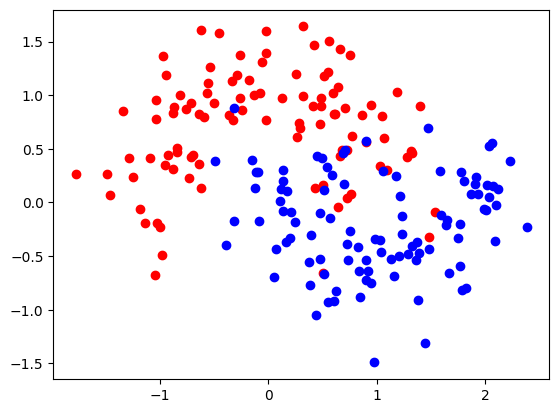

In [127]:
X, y = make_moons(200, noise=.35)
X, y = X.astype(np.float32), y.astype(np.float32).reshape(-1,1)
plt.scatter(X[:,0][y[:,0]==0], X[:,1][y[:,0]==0], color="red", label="class 0")
plt.scatter(X[:,0][y[:,0]==1], X[:,1][y[:,0]==1], color="blue", label="class 1")

create MLP and train!!

In [131]:
mlp = MLP3(neurons=[10,1], activations=["tanh","sigmoid"], reg=0.0)
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss=mlp.loss,
           metrics=[tf.keras.metrics.mae, tf.keras.metrics.binary_accuracy])

C:\Users\Kuro\AppData\Local\Temp\ipykernel_143236\3365076249.py:52: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  return MLP_class(neurons, activations, reg)


In [132]:
import shutil
try:
        shutil.rmtree("logs")
except:
        pass
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/no_regularization")
mlp.fit(X,y, epochs=400, batch_size=16, verbose=0, 
        callbacks=[tensorboard_callback])

observe the accuracy and classification frontier

7/7 [==============================] - 0s 1ms/step


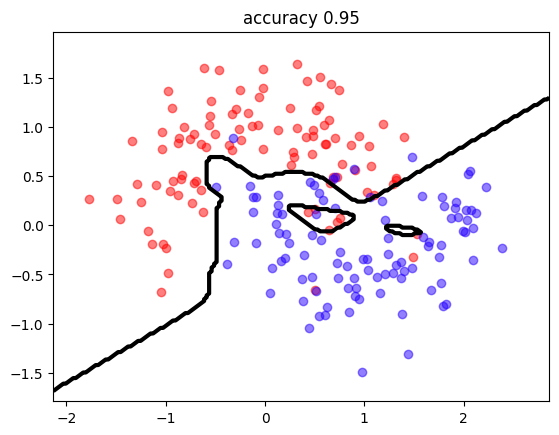

In [133]:
predict = lambda X: (mlp.predict(X)[:,0]>0.5).astype(int)
mlutils.plot_2Ddata_with_boundary(predict, X, y.reshape(-1));
plt.title("accuracy %.2f"%np.mean(predict(X)==y.reshape(-1)));

regularization must work!!!

C:\Users\Kuro\AppData\Local\Temp\ipykernel_143236\3365076249.py:52: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  return MLP_class(neurons, activations, reg)


7/7 [==============================] - 0s 1ms/step


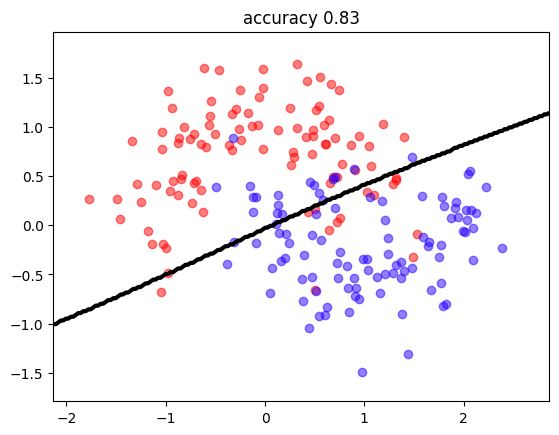

In [135]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/with_regularization")
mlp = MLP3(neurons=[10,1], activations=["tanh","sigmoid"], reg=0.005)

mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss=mlp.loss,
           metrics=[tf.keras.metrics.mae, tf.keras.metrics.binary_accuracy])

mlp.fit(X,y, epochs=400, batch_size=10, verbose=0, callbacks=[tensorboard_callback])
mlutils.plot_2Ddata_with_boundary(predict, X, y.reshape(-1))
plt.title("accuracy %.2f"%np.mean(predict(X)==y.reshape(-1)));

and inspect tensorboard

In [136]:
%load_ext tensorboard
%tensorboard --logdir logs


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 125944), started 6:04:47 ago. (Use '!kill 125944' to kill it.)

## LAB 3.2 - Low level `tensorflow`

In [ ]:
# !wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
# import init; init.init(force_download=False); 

In [ ]:
# from local.lib.rlxmoocapi import submit, session
# import inspect
# session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L03.02", varname="student");

In [137]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

tf.__version__

'2.15.0'

### TASK 1: Obtain layer output


**COMPLETE** the following function so that, when given a TF `model` and input  `X` returns the output of the model at layer `layer_name` when feeding `X` to the model.


You **MUST RETURN** a `numpy` array, **NOT** a tensor.

**HINT**: Use the [`tf.keras.Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model) class like in the functional API with `outputs` from the desired layer.

**CHALLENGE**: Solve it with a single line of code (not counting the `import`)

In [138]:
def output_at_layer(X, model, layer_name):
    from tensorflow.keras.models import Model
    r = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)(X)
    return r.numpy()

check your answer manually. With the following model and weights below you should get this answer:


        >> output_at_layer(X, model, "layer_A")
        array([[0.91274303, 0.69886017, 0.8832942 ],
               [0.9311633 , 0.7634138 , 0.8924969 ],
               [0.85661894, 0.5696809 , 0.8091405 ],
               [0.8952345 , 0.6803274 , 0.8326857 ]], dtype=float32)

        >> output_at_layer(X, model, "layer_B")
        array([[0.87063193, 0.8240411 ],
               [0.8774254 , 0.83376545],
               [0.84875023, 0.7963983 ],
               [0.86286545, 0.81590414]], dtype=float32)

        >> output_at_layer(X, model, "layer_C")
        array([[0.8959839 , 0.65980244],
               [0.9032545 , 0.66435313],
               [0.8733646 , 0.646801  ],
               [0.8883195 , 0.6559416 ]], dtype=float32)

In [139]:
def get_model(n1,n2,n3):
    model = Sequential()
    model.add(Dense(n1, name="layer_A", activation="tanh", input_dim=2))
    model.add(Dense(n2, name="layer_B", activation="sigmoid"))
    model.add(Dense(n3, name="layer_C", activation="linear"))
    return model


w = [np.array([[0.3336241 , 0.26024526, 0.37238857],
               [0.6344426 , 0.67660165, 0.31070882]], dtype=np.float32),
     np.array([0.97280777, 0.3447949 , 0.91722184], dtype=np.float32),
     
     np.array([[0.12999585, 0.31851983],
               [0.7763866 , 0.8777575 ],
               [0.99977154, 0.65771514]], dtype=np.float32),
     np.array([0.36222705, 0.05885772], dtype=np.float32),

     np.array([[0.75918376, 0.02541249],
               [0.21730722, 0.45021895]], dtype=np.float32),
     np.array([0.05594416, 0.26667854], dtype=np.float32)]


X = np.array([[0.9269997 , 0.41239464],
              [0.8461177 , 0.64935404],
              [0.27092433, 0.34251866],
              [0.22509325, 0.6301328 ]], dtype=np.float32)


model=get_model(3,2,2)
model.set_weights(w)

In [140]:
output_at_layer(X, model, "layer_A")

array([[0.91274303, 0.69886017, 0.8832942 ],
       [0.9311633 , 0.7634138 , 0.8924969 ],
       [0.85661894, 0.5696809 , 0.80914044],
       [0.8952345 , 0.6803274 , 0.8326857 ]], dtype=float32)

In [141]:
# which corresponds to a tanh activation from the input data
np.tanh(X.dot(w[0])+w[1])

array([[0.912743  , 0.69886017, 0.8832942 ],
       [0.9311633 , 0.7634138 , 0.89249694],
       [0.8566189 , 0.5696809 , 0.8091404 ],
       [0.89523464, 0.6803274 , 0.8326857 ]], dtype=float32)

In [142]:
output_at_layer(X, model, "layer_B")

array([[0.87063193, 0.8240411 ],
       [0.8774253 , 0.83376545],
       [0.8487502 , 0.7963983 ],
       [0.8628655 , 0.81590414]], dtype=float32)

In [143]:
# which corresponds to a sigmoid activation from the output of layer A
sigm = lambda x: 1/(1+np.exp(-x))
sigm(output_at_layer(X, model, "layer_A").dot(w[2])+w[3])


array([[0.870632  , 0.8240412 ],
       [0.8774254 , 0.8337655 ],
       [0.8487502 , 0.7963983 ],
       [0.86286545, 0.81590414]], dtype=float32)

In [144]:
output_at_layer(X, model, "layer_C")

array([[0.8959839 , 0.65980244],
       [0.90325445, 0.66435313],
       [0.87336457, 0.646801  ],
       [0.8883195 , 0.6559416 ]], dtype=float32)

In [145]:
# which corresponds to a linear activation from the output of layer B
output_at_layer(X, model, "layer_B").dot(w[-2])+w[-1]

array([[0.8959839 , 0.65980244],
       [0.90325445, 0.66435313],
       [0.87336457, 0.646801  ],
       [0.8883195 , 0.6559416 ]], dtype=float32)

**Registra tu solución en linea**

In [ ]:
# student.submit_task(namespace=globals(), task_id='T1');

### TASK 2: Implement batch normalization

Observe how we create a **ONE LAYER** model with **TANH** activation and batch normalization

In [147]:
def get_model(input_dim, n):
    model = Sequential()
    model.add(Dense(n, name="layer_A", activation="tanh", input_dim=input_dim))
    model.add(BatchNormalization())
    return model    

we manually initialize it with random weights and apply it to some random input

In [148]:

input_dim = np.random.randint(3)+2
n = np.random.randint(5)+5
X = np.random.random((6,input_dim)).astype(np.float32)
print ("input_dim", input_dim, ", n", n)


input_dim 4 , n 8


In [149]:

model = get_model(input_dim=input_dim, n=n)
model.set_weights([np.random.random(i.shape) for i in model.get_weights()])
model(X).numpy()


array([[0.44165254, 1.1526241 , 0.64138865, 0.7799299 , 1.5069997 ,
        1.6817778 , 0.7241907 , 0.46445966],
       [0.47885227, 1.1427419 , 0.68249273, 0.78124917, 1.5234283 ,
        1.7970355 , 0.6933745 , 0.44495654],
       [0.47658336, 1.1905735 , 0.68692815, 0.7861313 , 1.5467658 ,
        1.9335421 , 0.7297951 , 0.43082702],
       [0.5015652 , 1.1831849 , 0.6909487 , 0.7847295 , 1.547613  ,
        1.929171  , 0.72292674, 0.45212603],
       [0.48635513, 1.1863427 , 0.6728313 , 0.78235334, 1.5153894 ,
        1.9282395 , 0.7274095 , 0.46992314],
       [0.42666227, 1.1510816 , 0.628572  , 0.77802813, 1.4472319 ,
        1.7540445 , 0.707507  , 0.45594347]], dtype=float32)

and we can extract the weights of the dense layer and the batch normalization layer

In [150]:

W, b, gamma, beta, moving_mean, moving_var = model.get_weights()
W.shape, b.shape, beta.shape, moving_mean.shape, moving_var.shape


((4, 8), (8,), (8,), (8,), (8,))

**COMPLETE** the following function **WITHOUT USING TENSORFLOW** such that you get the same output as the model above, given the input and the weights.

In specific, the Dense layer output must be

$$A = \text{tanh}(XW+b)$$

And the batch normalization layer after that output is

$$\frac{A-m_\mu}{\sqrt{m_\sigma+\varepsilon}}\gamma + \beta$$

You **MUST RETURN** a `numpy` array, **NOT** a tensor.

**CHALLENGE**: Solve it with one single line of Python code.

In [151]:
def apply_model(X, W, b, gamma, beta, moving_mean, moving_var, epsilon=1e-3):
    r = ((np.tanh(np.dot(X, W) + b) - moving_mean) / np.sqrt(moving_var + epsilon)) * gamma + beta
    return r

check manually your code, the output should be the same as above.

In [152]:
apply_model(X, W, b, gamma, beta, moving_mean, moving_var)

array([[0.44165254, 1.1526239 , 0.64138865, 0.7799299 , 1.5069997 ,
        1.6817777 , 0.7241906 , 0.46445963],
       [0.47885227, 1.1427418 , 0.68249273, 0.78124917, 1.5234283 ,
        1.7970352 , 0.69337445, 0.44495654],
       [0.47658336, 1.1905732 , 0.6869282 , 0.7861313 , 1.5467658 ,
        1.933542  , 0.72979504, 0.43082702],
       [0.5015652 , 1.1831847 , 0.6909487 , 0.7847295 , 1.5476131 ,
        1.9291711 , 0.7229266 , 0.45212597],
       [0.48635513, 1.1863427 , 0.67283136, 0.7823533 , 1.5153894 ,
        1.9282396 , 0.7274095 , 0.469923  ],
       [0.4266623 , 1.1510814 , 0.6285719 , 0.77802813, 1.447232  ,
        1.7540445 , 0.707507  , 0.45594338]], dtype=float32)

**Registra tu solución en linea**

In [ ]:
# student.submit_task(namespace=globals(), task_id='T2');

### TASK 3: Compute the Hessian

Complete the function below so that computes the Hessian of a function with respect to a set of variables. Remember that the Hessian is the matrix with all combinations of double partial derivatives. See [https://en.wikipedia.org/wiki/Hessian_matrix](https://en.wikipedia.org/wiki/Hessian_matrix)


The arguments for your code below:

- `expression_fn`: is a Python function that, when executed, will return a Tensor depending on the variables in `svars`.
- `svars`: a list of $n$ `tf.Variable`s against which  the derivatives are to be taken.

The result:

- a `numpy` array of dimension $n\times n$, containing in each position the value of the corresponding double derivative evaluated with the value attached to each variable in `svars`.

See the example call below to understand what you have to produce.

**NOTE**: Observe that `expression_fn` is a function that you **must call** inside some `GradientTape` to obtain the expresion. This needs to be done this way because `GradientTape` needs to _watch_ how expressions are built to be able to access the computational graph and compute the gradient. This is a technique which is very often used in Tensorflow.



**WARN**: You cannot use `tf.hessian` or `GradientTape.jacobian` or `sympy`. Do not use the name `hessian` to name any variable within your code.

**HINT 1**: use a `GradientTape` inside another `GradientTape`.

**HINT 2**: use `unconnected_gradients=tf.UnconnectedGradients.ZERO` as argument to `GradientTape.gradient` to have the variables not participating in an expresion result in gradient zero. For instance with $f=xy$, we have $\frac{\partial f}{\partial y\partial y}=0$, since $\frac{\partial f}{\partial y}=1$. Or if we have $f=x$ we have $\frac{\partial f}{\partial y\partial x}=0$, since $\frac{\partial f}{\partial y}=0$. If you do not include this argument, Tensorflow will return these values as `None` and you would have to fix them later.

In [12]:
def get_double_derivatives(expression_fn, svars):
    import numpy as np
    import tensorflow as tf
    n = len(svars)
    solution_matrix = np.zeros((n, n))
    
    with tf.GradientTape(persistent=True) as tape_outer:
        with tf.GradientTape(persistent=True) as tape_inner:
            expression = expression_fn()
        gradients = [tape_inner.gradient(expression, svar, unconnected_gradients=tf.UnconnectedGradients.ZERO)
                     for svar in svars]
    
    for i in range(n):
        for j in range(n):
            solution_ij = tape_outer.gradient(gradients[i], svars[j], unconnected_gradients=tf.UnconnectedGradients.ZERO)
            if solution_ij is not None:
                solution_matrix[i, j] = solution_ij.numpy()
            else:
                solution_matrix[i, j] = 0.0
    
    return solution_matrix

check your code. The following expression

$$f = 2xy^2 + 3x\cos{y}$$

has as first derivatives:

- $\frac{\partial f }{\partial x} = 2y^2 +3\cos{y}$
- $\frac{\partial f }{\partial y} = 4xy - 3x\sin{y}$

and as second derivatives:

- $\frac{\partial f }{\partial x \partial x} = 0$
- $\frac{\partial f }{\partial x \partial y} = 4y - 3\sin{y}$
- $\frac{\partial f }{\partial y \partial x} = 4y - 3\sin{y}$
- $\frac{\partial f }{\partial y \partial y} = 4x - 3x\cos{y}$

which, when evaluated at $x=2$ and $y=-3$ yields

    [[  0     ,  -11.58],
     [ -11.58 ,   13.94]]

In [13]:
import tensorflow as tf
x = tf.Variable(2, dtype=tf.float32)
y = tf.Variable(-3, dtype=tf.float32)
expr = lambda: 2*x*y**2 + 3*x*tf.cos(y)

get_double_derivatives(expr, [x,y])

array([[  0.        , -11.57664013],
       [-11.57664013,  13.93995476]])

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T3');